# Movie Recommendation system
## 1. Introduction of the business problem
Build a movie recommendation system using machine learning techniques that suggests movies to users based on their preferences and past movie reviews
### (a) Defining problem statement
- The problem is to develop a movie recommendation system using machine learning techniques.
- The system should suggest movies to users based on their preferences and past movie reviews.
- The goal is to provide personalized movie recommendations by analyzing various movie features such as audience scores, genres, directors, and critic reviews.
### (b) Need of the project
- The entertainment industry has a vast collection of movies available across different platforms, making it difficult for viewers to navigate and discover films that align with their tastes.
- Movie recommender systems address this issue by leveraging advanced algorithms and data analysis techniques to offer personalized movie suggestions.
- By developing an effective movie recommendation system, users can save time and effort in searching for movies and enhance their overall entertainment experience.
### (c) Understanding the business case
- Movie recommendation systems have significant business potential as they can drive user engagement and retention on streaming platforms.
- By providing personalized recommendations, these systems can improve user satisfaction and increase user loyalty.
- A well-designed movie recommendation system can expose users to a broader range of films, including hidden gems and lesser-known titles, promoting diversity in movie consumption.
- Additionally, such systems can support filmmakers and content creators by facilitating the discovery and viewership of their work, leading to a more inclusive and diverse film industry.
## 2. Data report
### (a) Data Collection in Terms of Time, Frequency, and Methodology
#### (i) Time:
- The data collection process for the movie-related dataset from Rotten Tomatoes took place on April 12, 2023.
- The "rotten_tomatoes_movie_reviews.csv" dataset contains critic reviews published from January 2000 to April 8th, 2023.
- The "rotten_tomatoes_movies.csv" dataset captures movie release theater dates ranging from October 4th, 2002, to April 21st, 2023.
- The release streaming dates in the dataset range from September 24th, 2002, to August 24th, 2022.
#### (ii) Frequency:
- The dataset is updated annually, ensuring that it reflects the latest movie information available on Rotten Tomatoes.
- The annual updates enable users to access up-to-date analyses and insights into the movie industry.
#### (iii) Methodology:
- The data collection process involved scraping the publicly accessible website https://www.rottentomatoes.com.
- Advanced concurrent Python techniques were utilized to scrape the website efficiently and meticulously.
- The scraping methodology resulted in a highly efficient dataset with minimal inconsistencies between the fields in the movies and review datasets.
- The methodology ensured data accuracy and consistency, providing a reliable source of movie-related information.
### (b) Visual inspection of data (rows, columns, descriptive details)

#### (i) Import required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from wordcloud import WordCloud
import plotly.express as px
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

#### (ii) Load the dataset

In [2]:
data1 = pd.read_csv('rotten_tomatoes_movies.csv') # rotten_tomatoes_movies.csv stored as data1
data2 = pd.read_csv('rotten_tomatoes_movie_reviews.csv') # rotten_tomatoes_movie_reviews.csv stored as data2

#### (iii) Explore the dataset

In [3]:
data1.head() # Display the first few rows of the data1

,id,title,audienceScore,tomatoMeter,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,writer,boxOffice,distributor,soundMix
0,space-zombie-bingo,Space Zombie Bingo!,50.0,NaN,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,George Ormrod,"George Ormrod,John Sabotta",NaN,NaN,NaN
1,the_green_grass,The Green Grass,NaN,NaN,NaN,NaN,NaN,2020-02-11,114.0,Drama,English,Tiffany Edwards,Tiffany Edwards,NaN,NaN,NaN
2,love_lies,"Love, Lies",43.0,NaN,NaN,NaN,NaN,NaN,120.0,Drama,Korean,"Park Heung-Sik,Heung-Sik Park","Ha Young-Joon,Jeon Yun-su,Song Hye-jin",NaN,NaN,NaN
3,the_sore_losers_1997,Sore Losers,60.0,NaN,NaN,NaN,NaN,2020-10-23,90.0,"Action, Mystery & thriller",English,John Michael McCarthy,John Michael McCarthy,NaN,NaN,NaN
4,dinosaur_island_2002,Dinosaur Island,70.0,NaN,NaN,NaN,NaN,2017-03-27,80.0,"Fantasy, Adventure, Animation",English,Will Meugniot,John Loy,NaN,NaN,NaN


In [4]:
data1.tail() # Display the last few rows of the data1

,id,title,audienceScore,tomatoMeter,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,writer,boxOffice,distributor,soundMix
143253,nadia_the_secret_of_blue_water_the_motion_pict...,Nadia: The Secret of Blue Water: The Motion Pi...,14.0,NaN,NaN,NaN,2002-08-27,NaN,90.0,"Action, Adventure, Anime",Japanese,Sho Aono,Kaoru Umeno,NaN,ADV Films,NaN
143254,everyone_i_knew_and_loved,Everyone I Knew and Loved,NaN,NaN,NaN,NaN,NaN,NaN,99.0,Drama,English,Andrew Behringer,Erika Heidewald,NaN,NaN,NaN
143255,the-human-body,The Human Body,71.0,89.0,NaN,NaN,NaN,NaN,43.0,Documentary,English,Peter Georgi,Richard Dale,NaN,NaN,NaN
143256,flying_fists,Flying Fists,NaN,NaN,NaN,NaN,NaN,2006-11-21,63.0,Drama,English,Robert F. Hill,"Robert F. Hill,Basil Dickey",NaN,NaN,NaN
143257,awakening-2005,Awakening,NaN,NaN,NaN,NaN,NaN,NaN,90.0,Horror,English,David J. Francis,"David J. Francis,Mike Masters",NaN,NaN,NaN


In [5]:
data2.head() # Display the first few rows of the data2

,id,reviewId,creationDate,criticName,isTopCritic,originalScore,reviewState,publicatioName,reviewText,scoreSentiment,reviewUrl
0,beavers,1145982,2003-05-23,Ivan M. Lincoln,False,3.5/4,fresh,Deseret News (Salt Lake City),Timed to be just long enough for most youngste...,POSITIVE,http://www.deseretnews.com/article/700003233/B...
1,blood_mask,1636744,2007-06-02,The Foywonder,False,1/5,rotten,Dread Central,It doesn't matter if a movie costs 300 million...,NEGATIVE,http://www.dreadcentral.com/index.php?name=Rev...
2,city_hunter_shinjuku_private_eyes,2590987,2019-05-28,Reuben Baron,False,NaN,fresh,CBR,The choreography is so precise and lifelike at...,POSITIVE,https://www.cbr.com/city-hunter-shinjuku-priva...
3,city_hunter_shinjuku_private_eyes,2558908,2019-02-14,Matt Schley,False,2.5/5,rotten,Japan Times,The film's out-of-touch attempts at humor may ...,NEGATIVE,https://www.japantimes.co.jp/culture/2019/02/0...
4,dangerous_men_2015,2504681,2018-08-29,Pat Padua,False,NaN,fresh,DCist,Its clumsy determination is endearing and some...,POSITIVE,http://dcist.com/2015/11/out_of_frame_dangerou...


In [6]:
data2.tail() # Display the last few rows of the data2

,id,reviewId,creationDate,criticName,isTopCritic,originalScore,reviewState,publicatioName,reviewText,scoreSentiment,reviewUrl
1444958,thor_love_and_thunder,102706151,2022-07-05,Christie Cronan,False,7/10,fresh,Raising Whasians,Solid but not totally sold&#44; Thor&#58; Ragn...,POSITIVE,https://raisingwhasians.com/thor-love-and-thun...
1444959,thor_love_and_thunder,102706150,2022-07-05,Ian Sandwell,False,4/5,fresh,Digital Spy,Thor&#58; Love and Thunder is the most enterta...,POSITIVE,https://www.digitalspy.com/movies/a40496050/th...
1444960,thor_love_and_thunder,102706149,2022-07-05,Lauren LaMagna,False,8/10,fresh,Next Best Picture,&quot;Thor&#58; Love and Thunder&quot; is a st...,POSITIVE,https://www.nextbestpicture.com/thor-love-and-...
1444961,thor_love_and_thunder,102706148,2022-07-05,Jake Cole,True,1/4,rotten,Slant Magazine,Across Taika Waititi&#8217;s film&#44; a war a...,NEGATIVE,https://www.slantmagazine.com/film/thor-love-a...
1444962,thor_love_and_thunder,102706147,2022-07-05,Roger Moore,False,2.5/4,fresh,Movie Nation,It&#8217;s the jokes that make it&#44; with th...,POSITIVE,https://rogersmovienation.com/2022/07/05/movie...


In [7]:
data1.shape # Get an overview of the dataset's shape (number of rows and columns) of data1

(143258, 16)

In [8]:
data2.shape # Get an overview of the dataset's shape (number of rows and columns) of data2

(1444963, 11)

In [9]:
data1.columns # View the column names of data1

Index(['id', 'title', 'audienceScore', 'tomatoMeter', 'rating',
       'ratingContents', 'releaseDateTheaters', 'releaseDateStreaming',
       'runtimeMinutes', 'genre', 'originalLanguage', 'director', 'writer',
       'boxOffice', 'distributor', 'soundMix'],
      dtype='object')

In [10]:
data2.columns # View the column names of data2

Index(['id', 'reviewId', 'creationDate', 'criticName', 'isTopCritic',
       'originalScore', 'reviewState', 'publicatioName', 'reviewText',
       'scoreSentiment', 'reviewUrl'],
      dtype='object')

In [11]:
data1.info() # view the data type of data1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143258 entries, 0 to 143257
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    143258 non-null  object 
 1   title                 142891 non-null  object 
 2   audienceScore         73248 non-null   float64
 3   tomatoMeter           33877 non-null   float64
 4   rating                13991 non-null   object 
 5   ratingContents        13991 non-null   object 
 6   releaseDateTheaters   30773 non-null   object 
 7   releaseDateStreaming  79420 non-null   object 
 8   runtimeMinutes        129431 non-null  float64
 9   genre                 132175 non-null  object 
 10  originalLanguage      129400 non-null  object 
 11  director              139064 non-null  object 
 12  writer                90116 non-null   object 
 13  boxOffice             14743 non-null   object 
 14  distributor           23005 non-null   object 
 15  

In [12]:
data2.info() # view the data type of data2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1444963 entries, 0 to 1444962
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   id              1444963 non-null  object
 1   reviewId        1444963 non-null  int64 
 2   creationDate    1444963 non-null  object
 3   criticName      1444963 non-null  object
 4   isTopCritic     1444963 non-null  bool  
 5   originalScore   1009745 non-null  object
 6   reviewState     1444963 non-null  object
 7   publicatioName  1444963 non-null  object
 8   reviewText      1375738 non-null  object
 9   scoreSentiment  1444963 non-null  object
 10  reviewUrl       1234038 non-null  object
dtypes: bool(1), int64(1), object(9)
memory usage: 111.6+ MB


#### (iv) Perform descriptive analysis

In [13]:
data1.describe() # Generate summary statistics of the numerical columns of data1


,audienceScore,tomatoMeter,runtimeMinutes
count,73248.000000,33877.000000,129431.000000
mean,55.674967,65.770346,93.708578
std,24.553648,28.023203,28.129175
min,0.000000,0.000000,1.000000
25%,37.000000,45.000000,84.000000
50%,57.000000,73.000000,92.000000
75%,76.000000,89.000000,103.000000
max,100.000000,100.000000,2700.000000


From the analysis of the columns "audienceScore," "tomatoMeter," and "runtimeMinutes," the following observations can be made:

"audienceScore":

- The average audience score is 55.67, indicating a moderate overall rating by regular viewers.
- The standard deviation of 24.55 suggests a significant variation in audience ratings, indicating diverse opinions and preferences.
- The minimum score of 0 and the maximum score of 100 show the range of possible ratings.
- The interquartile range (25th to 75th percentile) of 37 to 76 indicates that the majority of movies fall within this range, with a wide distribution of scores.

"tomatoMeter":

- The average tomato meter score is 65.77, representing the percentage of positive reviews from professional critics.
- The standard deviation of 28.02 suggests a moderate level of variation in critic ratings.
- The minimum score of 0 and the maximum score of 100 show the range of possible ratings.
- The interquartile range (25th to 75th percentile) of 45 to 89 indicates that the majority of movies have a critic rating within this range.

"runtimeMinutes":

- The average movie runtime is approximately 93.71 minutes.
- The standard deviation of 28.13 suggests a moderate level of variation in movie durations.
- The minimum runtime of 1 minute and the maximum runtime of 2700 minutes indicate a wide range of movie lengths.
- The interquartile range (25th to 75th percentile) of 84 to 103 shows that most movies have a runtime within this range.

This analysis provides insights into the distribution and summary statistics of the audience scores, critic scores, and movie runtimes. It helps in understanding the average ratings, variation, and range of these variables, which can be further explored and analyzed in the context of movie recommendations and user preferences.

In [14]:
data2.describe() # Generate summary statistics of the numerical columns of data2

,reviewId
count,1.444963e+06
mean,9.035203e+06
std,2.575716e+07
min,1.000000e+00
25%,1.610366e+06
50%,2.200337e+06
75%,2.587024e+06
max,1.027962e+08


Review Id. is not important for analysing summary statistics

In [15]:
data1.nunique() # Count the number of unique values in each column of data1

id                      142052
title                   126403
audienceScore              101
tomatoMeter                101
rating                      10
ratingContents            8353
releaseDateTheaters      12062
releaseDateStreaming      4726
runtimeMinutes             324
genre                     2912
originalLanguage           112
director                 62207
writer                   67274
boxOffice                 4863
distributor               3694
soundMix                   551
dtype: int64

From the analysis of the unique values in each column, the following observations can be made:

- "id": There are a total of 142,052 unique movie IDs in the dataset, indicating the presence of a large number of distinct movies.

- "title": There are 126,403 unique movie titles, indicating that some movies may have multiple entries in the dataset.

- "audienceScore" and "tomatoMeter": Both columns have 101 unique values, suggesting that the scoring systems for audience scores and critic ratings have a fixed range or scale.

- "rating": There are 10 unique values in the rating column, indicating different age-based classification categories for movies, such as G, PG, PG-13, R, and others.

- "ratingContents": There are 8,353 unique values in the ratingContents column, which suggests a wide variety of content descriptors or factors considered for movie ratings.

- "releaseDateTheaters" and "releaseDateStreaming": These columns have 12,062 and 4,726 unique values, respectively, indicating a large number of distinct release dates for movies in theaters and streaming platforms.

- "runtimeMinutes": There are 324 unique values for movie runtimes, indicating a diverse range of durations for movies in the dataset.

- "genre": The genre column has 2,912 unique values, indicating a wide variety of movie genres available in the dataset.

- "originalLanguage": There are 112 unique original languages in which the movies are produced, showcasing linguistic diversity in the dataset.

- "director", "writer", "boxOffice", "distributor", and "soundMix": These columns have a large number of unique values, indicating a wide range of directors, writers, box office revenue figures, distributors, and sound mixing formats in the dataset.



In [16]:
data2.nunique() # Count the number of unique values in each column of data2

id                  69263
reviewId          1432569
creationDate         8510
criticName          15510
isTopCritic             2
originalScore        1729
reviewState             2
publicatioName       2707
reviewText        1359771
scoreSentiment          2
reviewUrl         1138350
dtype: int64

From the analysis of the unique values in each column of the "rotten_tomatoes_movie_reviews.csv" dataset, the following observations can be made:

- "id": There are 69,263 unique movie IDs in the dataset, indicating that multiple critic reviews exist for different movies.

- "reviewId": There are 1,432,569 unique review IDs, suggesting that each critic review has a distinct identifier.

- "creationDate": There are 8,510 unique creation dates, indicating that the critic reviews were published on different dates.

- "criticName": There are 15,510 unique critic names, implying the presence of a diverse group of critics providing reviews.

- "isTopCritic": This column has two unique values, suggesting that the critics are categorized as either top critics (true) or non-top critics (false).

- "originalScore": There are 1,729 unique original scores given by the critics for the movies.

- "reviewState": This column has two unique values, indicating the status of the review as either fresh or rotten.

- "publicationName": There are 2,707 unique publication names, suggesting that critics from various publications have contributed reviews.

- "reviewText": There are 1,359,771 unique review texts, indicating a wide range of textual content for the critic reviews.

- "scoreSentiment": This column has two unique values, representing the sentiment of the critic's score as either positive or negative.

- "reviewUrl": There are 1,138,350 unique review URLs, suggesting that each review has a specific web address for reference.

In [17]:
data1.isnull().sum() # Check for missing values in the dataset data1

id                           0
title                      367
audienceScore            70010
tomatoMeter             109381
rating                  129267
ratingContents          129267
releaseDateTheaters     112485
releaseDateStreaming     63838
runtimeMinutes           13827
genre                    11083
originalLanguage         13858
director                  4194
writer                   53142
boxOffice               128515
distributor             120253
soundMix                127341
dtype: int64

From the null value analysis of each column in the dataset, the following observations can be made:

- "id": There are no null values in the "id" column, indicating that all movies have a unique identifier.

- "title": There are 367 null values in the "title" column, suggesting that some movie titles are missing in the dataset.

- "audienceScore": There are 70,010 null values in the "audienceScore" column, indicating that audience scores are not available for a significant number of movies.

- "tomatoMeter": There are 109,381 null values in the "tomatoMeter" column, suggesting that the tomato meter ratings provided by professional critics are missing for a large number of movies.

- "rating" and "ratingContents": Both columns have 129,267 null values, indicating that the age-based classification and associated rating contents are missing for a substantial number of movies.

- "releaseDateTheaters": There are 112,485 null values in the "releaseDateTheaters" column, suggesting that the theater release dates are not available for a significant number of movies.

- "releaseDateStreaming": There are 63,838 null values in the "releaseDateStreaming" column, indicating that the streaming release dates are missing for a considerable number of movies.

- "runtimeMinutes": There are 13,827 null values in the "runtimeMinutes" column, suggesting that the duration of the movies in minutes is not available for some entries.

- "genre": There are 11,083 null values in the "genre" column, indicating that the genre(s) of the movies are missing for some entries.

- "originalLanguage": There are 13,858 null values in the "originalLanguage" column, suggesting that the original language of the movies is not available for some entries.

- "director": There are 4,194 null values in the "director" column, indicating that the director information is missing for some movies.

- "writer": There are 53,142 null values in the "writer" column, suggesting that the information about the writers responsible for the screenplay is missing for some movies.

- "boxOffice": There are 128,515 null values in the "boxOffice" column, indicating that the box office revenue information is not available for a large number of movies.

- "distributor" and "soundMix": Both columns have a significant number of null values, with 120,253 and 127,341 null values, respectively. This suggests that the information about the movie distributor and sound mixing details is missing for many entries.

In [18]:
data2.isnull().sum() # Check for missing values in the dataset data2

id                     0
reviewId               0
creationDate           0
criticName             0
isTopCritic            0
originalScore     435218
reviewState            0
publicatioName         0
reviewText         69225
scoreSentiment         0
reviewUrl         210925
dtype: int64

From the null value analysis of each column in the "rotten_tomatoes_movie_reviews.csv" dataset, the following observations can be made:

- "id" and "reviewId": There are no null values in both the "id" and "reviewId" columns, indicating that each critic review has a unique identifier.

- "creationDate", "criticName", "isTopCritic", "reviewState", and "publicatioName": There are no null values in these columns, suggesting that the information related to the creation date, critic's name, their top critic status, review state, and publication name is available for all reviews.

- "originalScore": There are 435,218 null values in the "originalScore" column, indicating that the original score given by the critic is missing for a significant number of reviews.

- "reviewText": There are 69,225 null values in the "reviewText" column, suggesting that the full text of the critic's review is missing for a considerable number of entries.

- "scoreSentiment": There are no null values in the "scoreSentiment" column, indicating that the sentiment of the critic's score is available for all reviews.

- "reviewUrl": There are 210,925 null values in the "reviewUrl" column, suggesting that the URL of the original review on Rotten Tomatoes is missing for a large number of reviews.

### (c) Understanding of attributes (Variable info, renaming)

#### (i) Rotten Tomatoes Movies Dataset

The Rotten Tomatoes Movies Dataset provides a comprehensive set of attributes that capture various aspects of movies. These attributes offer valuable information for analyzing and understanding the movies in the dataset.

The "id" attribute serves as a unique identifier for each movie, allowing for easy referencing and identification. The "title" attribute represents the name of the movie, providing a quick overview of the movie's identity.

The "audienceScore" attribute reflects the average score given by regular viewers, indicating their overall satisfaction with the movie. This score helps gauge the movie's popularity and appeal among the general audience.

The "tomatoMeter" attribute measures the percentage of positive reviews from professional critics, providing insights into the critical reception of the movie. This attribute gives an indication of the movie's quality and critical acclaim.

The "rating" attribute categorizes the movie based on age-based classification, such as G, PG, PG-13, or R. This classification helps viewers determine the movie's suitability for different age groups.

The "ratingContents" attribute provides information about the content that influenced the rating classification. It offers additional context regarding the movie's themes, violence, language, or other elements that may be relevant to viewers.

The "releaseDateTheatres" attribute represents the date when the movie was initially released in theaters, indicating its theatrical debut. This attribute allows for analyzing the performance and success of movies over time.

The "releaseDateStreaming" attribute indicates the date when the movie became available for streaming, reflecting its availability on online platforms. This attribute highlights the shift in movie distribution and viewing habits.

The "runtimeMinutes" attribute captures the duration of the movie in minutes, providing information about its length. This attribute helps viewers plan their movie-watching experience and can be a factor in determining movie preferences.

The "genre" attribute specifies the genre(s) to which the movie belongs, such as action, comedy, drama, or thriller. This attribute allows for analyzing movie trends, preferences, and audience segmentation based on genre.

The "originalLanguage" attribute denotes the original language of the movie, offering insights into the movie's cultural context and target audience.

The "director" attribute identifies the director of the movie, providing information about the creative vision and style behind its production.

The "writer" attribute indicates the writer(s) responsible for the movie's screenplay, showcasing the creative minds behind the storytelling.

The "boxOffice" attribute represents the movie's total box office revenue, indicating its financial success. This attribute allows for analyzing the commercial performance and popularity of movies.

The "distributor" attribute specifies the company responsible for distributing the movie, offering insights into the movie's marketing and distribution strategies.

The "soundMix" attribute captures the audio format(s) used in the movie, such as Dolby Digital or DTS. This attribute highlights the technical aspects of the movie's audio production.

Together, these attributes in the Rotten Tomatoes Movies Dataset provide a rich and diverse set of information that enables comprehensive analysis, understanding, and evaluation of the movies within the dataset.

### (ii) Rotten Tomatoes Movie Reviews Dataset

The Rotten Tomatoes Movie Reviews Dataset contains a variety of attributes that provide valuable insights into the movie reviews and critics' opinions.

The "id" attribute serves as a unique identifier for each movie, linking the movie reviews to their respective movies in the Rotten Tomatoes Movies Dataset. This allows for easy cross-referencing and analysis between the movie attributes and the corresponding reviews.

The "reviewId" attribute is a unique identifier for each critic review, enabling individual review tracking and analysis.

The "creationDate" attribute indicates the date when the review was published, providing a temporal dimension to the dataset. This attribute allows for analyzing trends and changes in critics' opinions over time.

The "criticName" attribute captures the name of the critic who wrote the review, providing information about the individual critics and their perspectives. It allows for analyzing the opinions and biases of different critics.

The "isTopCritic" attribute is a boolean value indicating whether the critic is considered a top critic. This attribute helps identify reviews from prominent and influential critics, whose opinions may carry more weight.

The "originalScore" attribute represents the score provided by the critic in their review. This numeric rating reflects the critic's assessment of the movie's quality and provides a quantitative measure of their opinion.

The "reviewState" attribute indicates the status of the review, such as "fresh" or "rotten," based on the critic's overall evaluation. This attribute offers a summary of the critic's opinion and categorizes it as positive or negative.

The "publicationName" attribute specifies the name of the publication where the review was published, providing insights into the source and reputation of the review. It allows for analyzing reviews from different publications and their influence.

The "reviewText" attribute contains the full text of the critic's review, offering a detailed analysis and interpretation of their opinion. This attribute provides the textual content for sentiment analysis, text mining, and qualitative analysis.

The "scoreSentiment" attribute captures the sentiment associated with the critic's score, categorizing it as positive, negative, or neutral. This attribute helps understand the overall sentiment expressed by the critic towards the movie.

The "reviewUrl" attribute provides the URL of the original review on Rotten Tomatoes. It allows for accessing the full review text and exploring additional information related to the review.

Overall, these attributes in the Rotten Tomatoes Movie Reviews Dataset enable detailed analysis of critic reviews, including the scores, sentiments, publication sources, and textual content. They offer valuable insights into the reception and opinions of movies from various critics, facilitating comprehensive assessments and evaluations of movie quality and critical reception.

## 3. Exploratory Data Analysis

### (a) Univariate Analysis

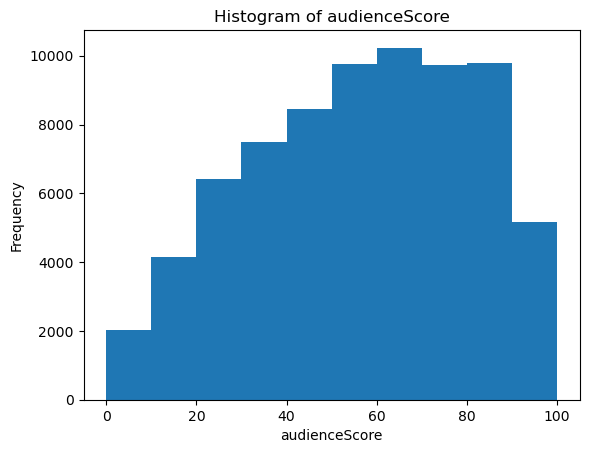

In [19]:
# Plot a histogram of audienceScore column of data1
plt.hist(data1['audienceScore'])
plt.xlabel('audienceScore')
plt.ylabel('Frequency')
plt.title('Histogram of audienceScore')
plt.show()

From the histogram, we can observe the distribution pattern of the audience scores. It appears that a large number of scores fall within the range of 40 to 80, indicating a relatively higher concentration of scores in that range. The distribution is somewhat skewed to the right, with fewer scores in the lower and higher ranges. This information provides an overview of the audience score distribution and can be useful for understanding the overall rating pattern of the movies.

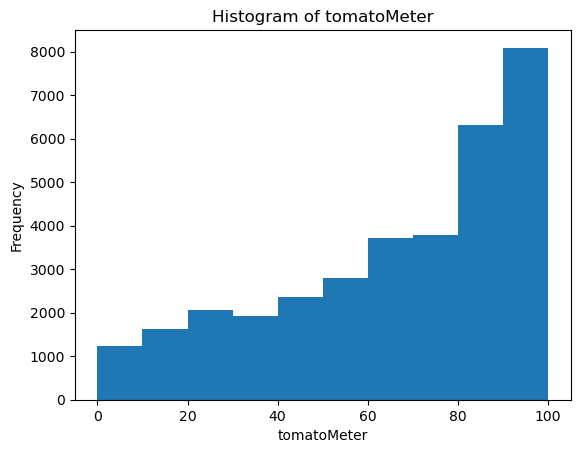

In [20]:
# Plot a histogram of tomatoMeter column of data1
plt.hist(data1['tomatoMeter'])
plt.xlabel('tomatoMeter')
plt.ylabel('Frequency')
plt.title('Histogram of tomatoMeter')
plt.show()

From the histogram, we can observe the distribution pattern of the tomatoMeter scores. It appears that a significant number of scores fall within the range of 80 to 100, indicating a higher concentration of positive reviews or higher ratings. The distribution is somewhat skewed to the right, with fewer scores in the lower ranges. This information provides insights into the distribution and overall rating pattern of the movies as assessed by professional critics.

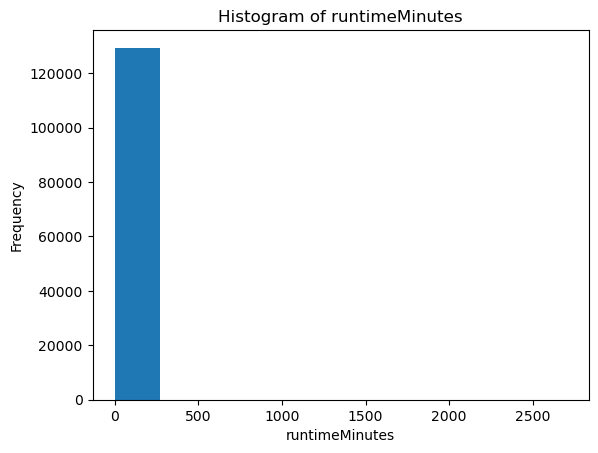

In [21]:
# Plot a histogram of runtimeMinutes column of data1
plt.hist(data1['runtimeMinutes'])
plt.xlabel('runtimeMinutes')
plt.ylabel('Frequency')
plt.title('Histogram of runtimeMinutes')
plt.show()

From the histogram, we can observe the distribution pattern of the movie runtimes. The majority of movies fall within the lower range of runtime minutes, as indicated by the higher frequency in the first bin. There are only a few movies with longer runtimes, as evidenced by the lower frequencies in the higher bins. This information provides insights into the distribution of movie durations and can help understand the typical length of movies in the dataset.

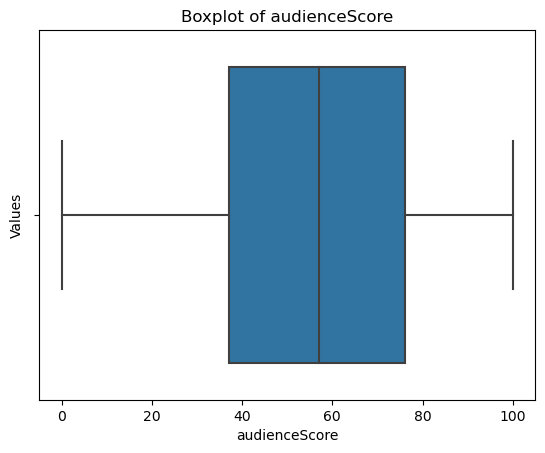

In [22]:
# Create a boxplot of a audienceScore column of data1
sn.boxplot(x=data1['audienceScore'])
plt.ylabel('Values')
plt.title('Boxplot of audienceScore')
plt.show()

The box plot for the "audienceScore" data reveals that there are no visible outliers in the dataset. A box plot provides a visual representation of the distribution, variability, and potential outliers in a dataset.Since the description states that there are no visible outliers, it suggests that all the audience scores fall within the range of the whiskers. The absence of outliers indicates that the majority of the audience scores are relatively consistent and do not deviate significantly from the central tendency of the data.This information suggests that the audience scores tend to be clustered around a specific range, without any extreme values that could potentially skew the overall distribution. It indicates a relatively stable and homogeneous pattern in the audience ratings for the movies in the dataset.

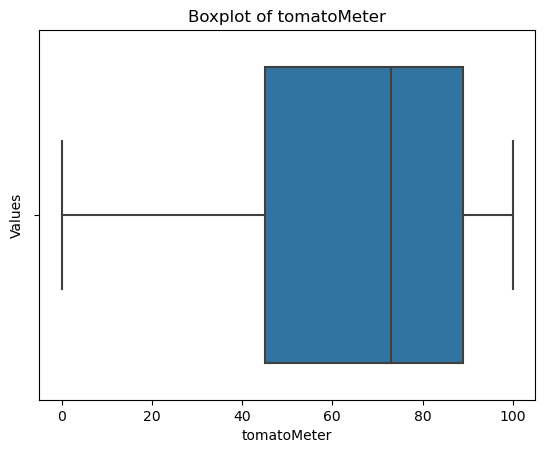

In [23]:
# Create a boxplot of a tomatoMeter column of data1
sn.boxplot(x=data1['tomatoMeter'])
plt.ylabel('Values')
plt.title('Boxplot of tomatoMeter')
plt.show()

The box plot for the "tomatoMeter" data reveals that there are no visible outliers in the dataset. A box plot provides a visual representation of the distribution, variability, and potential outliers in a dataset.Since the description states that there are no visible outliers, it suggests that all the audience scores fall within the range of the whiskers. The absence of outliers indicates that the majority of the audience scores are relatively consistent and do not deviate significantly from the central tendency of the data.This information suggests that the audience scores tend to be clustered around a specific range, without any extreme values that could potentially skew the overall distribution. It indicates a relatively stable and homogeneous pattern in the audience ratings for the movies in the dataset.

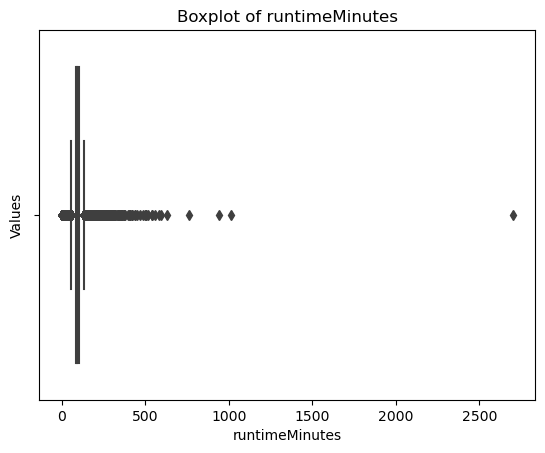

In [24]:
# Create a boxplot of a runtimeMinutes column of data1
sn.boxplot(x=data1['runtimeMinutes'])
plt.ylabel('Values')
plt.title('Boxplot of runtimeMinutes')
plt.show()

The box plot for the "runtimeMinutes" data reveals the presence of visible outliers. Outliers are data points that significantly deviate from the central distribution of the dataset.The description states that the number of outliers for the "runtimeMinutes" data is 14,720, which indicates a substantial number of data points that deviate from the overall distribution. These outliers represent movies with significantly longer or shorter runtime durations compared to the majority of movies in the dataset.The description states that the number of outliers for the "runtimeMinutes" data is 14,720, which indicates a substantial number of data points that deviate from the overall distribution. These outliers represent movies with significantly longer or shorter runtime durations compared to the majority of movies in the dataset.

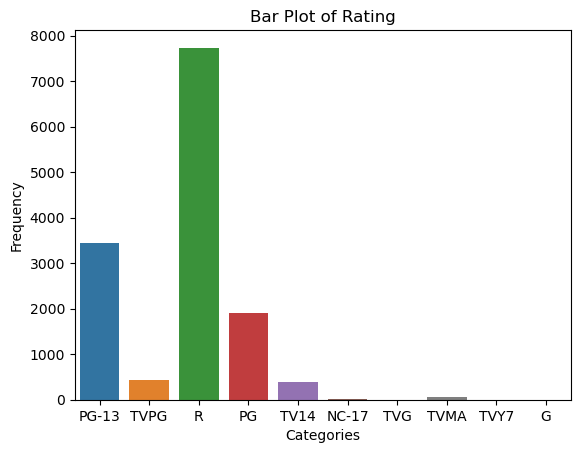

In [25]:
# Create bar plot for categorical variable rating
sn.countplot(x='rating', data=data1)
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Bar Plot of Rating')
plt.show()

The bar plot of the 'rating' column provides a visual representation of the frequency distribution of different categories in the 'rating' variable. Here's a description of the bar plot:
The bar plot displays the number of occurrences of each category in the 'rating' column. Each bar represents a category, and the height of the bar corresponds to the frequency or count of that category in the dataset.
By examining the bar plot, we can observe the following:
- The 'rating' column consists of 10 categories, each representing a different rating assigned to movies.
- The most common rating category appears is 'R' which has the highest frequency, as indicated by the tallest bar on the plot.
- The height of the bars decreases gradually from the most frequent category 'R' to the next frequent category 'PG-13', 'PG', 'TVPG', 'TV14' to the least frequent category 'G', 'TVY7', and 'TVG' suggesting a decreasing trend in the frequencies of different ratings.
- The plot allows us to compare the relative frequencies of different rating categories, providing an overview of the distribution of movie ratings in the dataset.

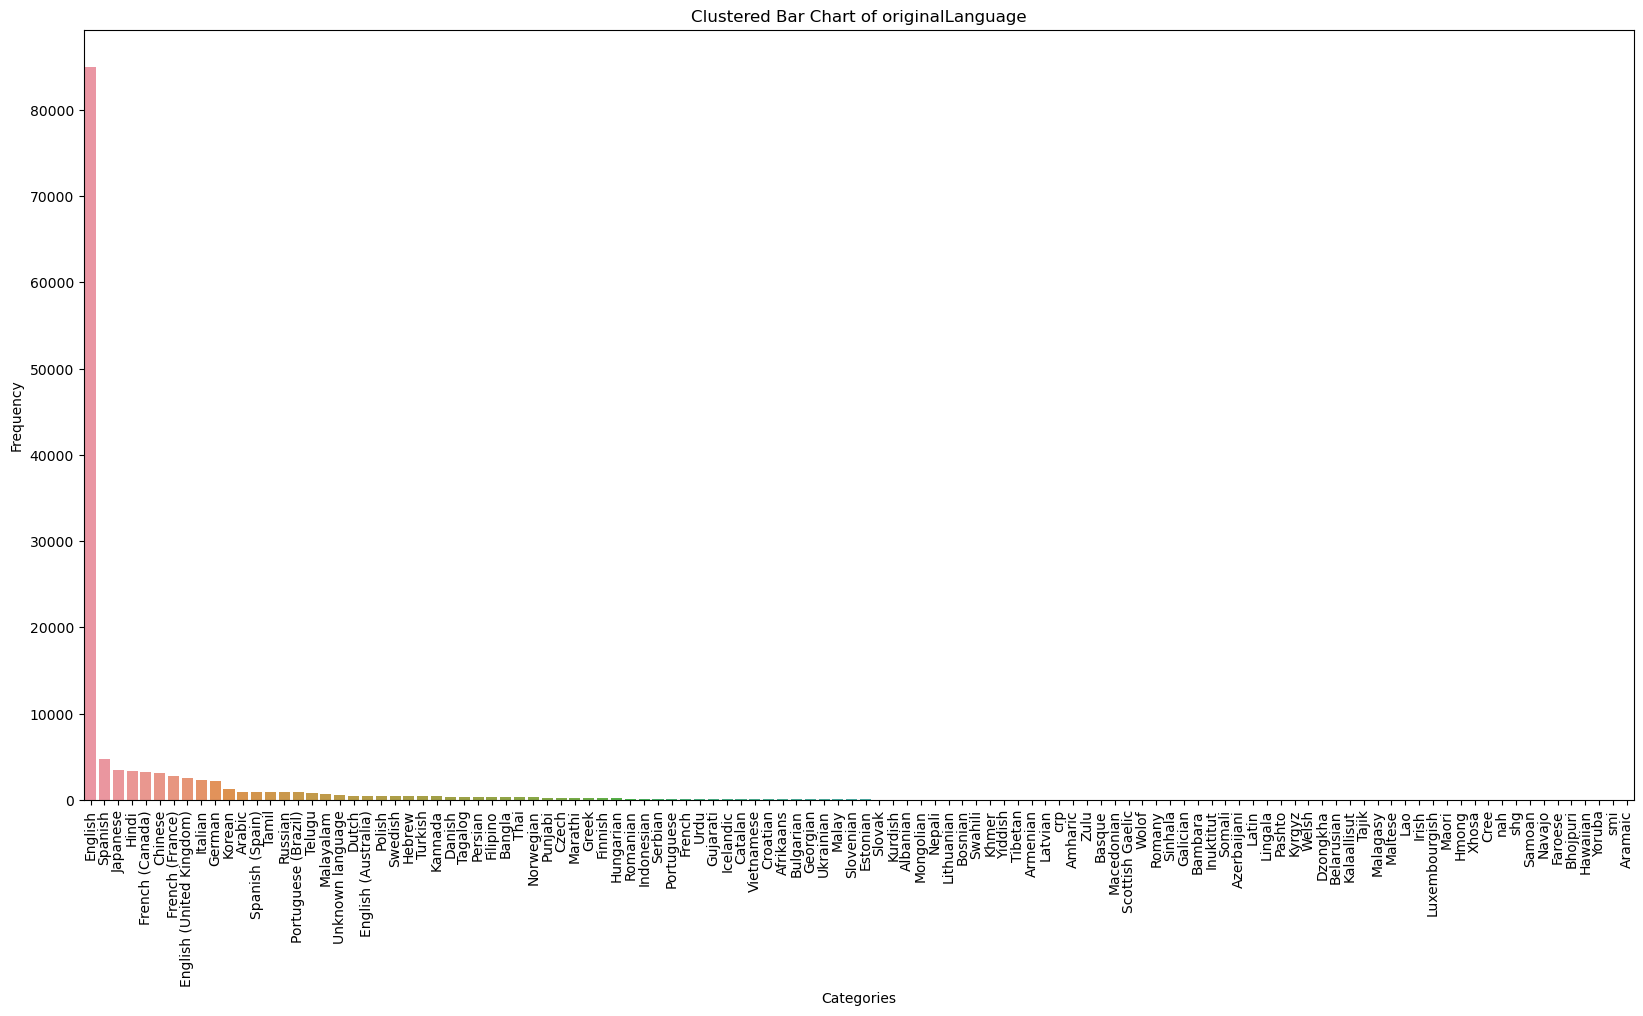

In [26]:
# Create clustered bar plot for OriginalLanguage
# Count the frequency of each category
language_counts = data1['originalLanguage'].value_counts()

# Reset the index of the counts
language_counts = language_counts.reset_index()

# Rename the columns
language_counts.columns = ['originalLanguage', 'frequency']

# Plot the clustered bar chart with increased X-axis scale
plt.figure(figsize=(20, 10))
sn.barplot(x='originalLanguage', y='frequency', data=language_counts)
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Clustered Bar Chart of originalLanguage')
plt.xticks(rotation=90)
plt.show()

The clustered bar plot of the 'originalLanguage' variable provides an insightful visualization of the distribution of movie languages in the dataset.
The majority of movies in the dataset are in English, accounting for approximately 85% of the total movies (approximately 11,000 movies). This indicates that English-language movies have a significant presence in the dataset.
On the other hand, the remaining languages collectively make up less than 15% of the dataset, with each individual language representing less than 2.5% of the total movies (approximately 300 movies or less). This suggests that movies in languages other than English have relatively smaller representation in the dataset.
The clustered bar chart effectively highlights the dominance of English-language movies while emphasizing the relatively smaller proportions of movies in other languages. This information can be valuable for understanding the language diversity within the dataset and its implications for language-based analyses or preferences among moviegoers.

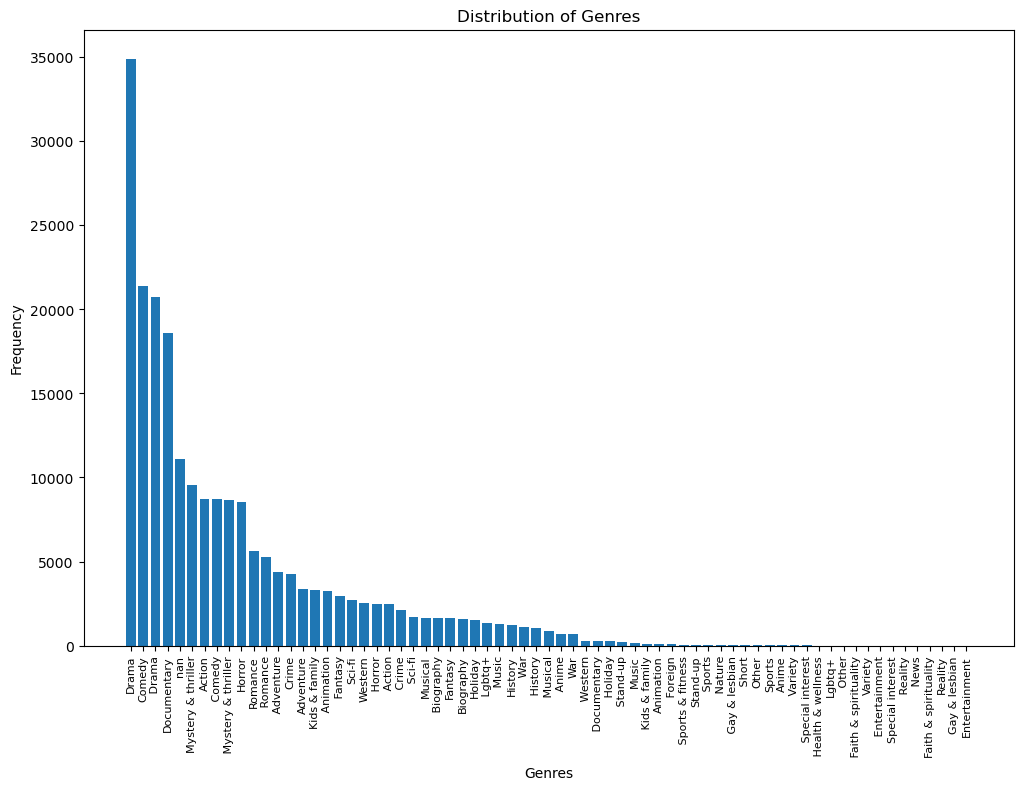

In [27]:
# Assuming that genres are separated by a comma in 'genre' column
# Create a series where each element is a list of genres for each movie
data1['genre'] = data1['genre'].astype(str)
genres = data1['genre'].str.split(',')

# Create an empty dictionary to hold the frequency count of each genre
genre_counts = {}

# Loop through the series and count the frequency of each genre
for genre_list in genres:
    for genre in genre_list:
        if genre in genre_counts:
            genre_counts[genre] += 1
        else:
            genre_counts[genre] = 1

# Convert the dictionary to a DataFrame for easier plotting
genre_counts_df = pd.DataFrame(list(genre_counts.items()), columns=['Genre', 'Count'])

# Sort the DataFrame by Count
genre_counts_df = genre_counts_df.sort_values(by='Count', ascending=False)

# Plot the frequencies
plt.figure(figsize=(12,8))
plt.bar(genre_counts_df['Genre'], genre_counts_df['Count'])
plt.title('Distribution of Genres')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.xticks(rotation=90, fontsize=8) # Rotate the labels and decrease the font size
plt.show()

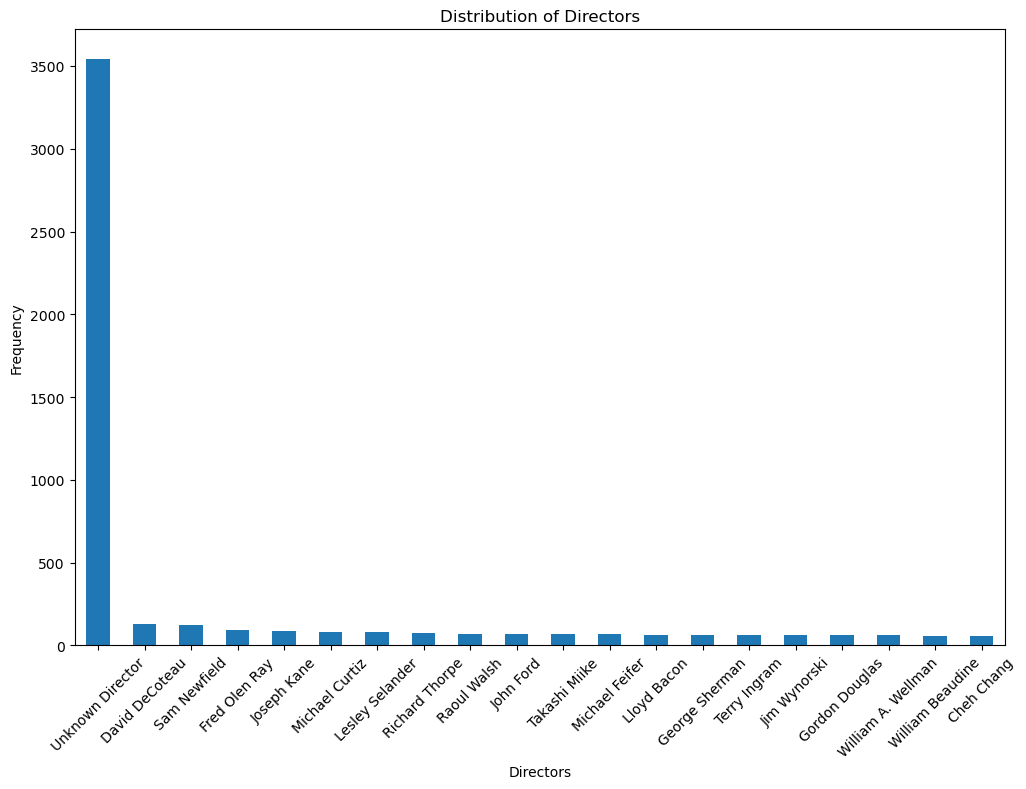

In [28]:
# Calculate director frequencies
director_counts = data1['director'].value_counts()

# Since there might be many directors, let's plot the top 20 directors
top_directors = director_counts[:20]

# Plot the frequencies
plt.figure(figsize=(12,8))
top_directors.plot(kind='bar')
plt.title('Distribution of Directors')
plt.xlabel('Directors')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

The word cloud visualization of the "director" column provides insights into the distribution of different directors in the dataset. The size of each director's name in the word cloud corresponds to their frequency or occurrence in the dataset.
From the generated word cloud, it is evident that the directors "Michael" and "John" dominate the dataset as their names appear with larger font sizes, indicating a higher frequency of occurrence. These two directors have a significant presence compared to others.
Following the dominant directors, we can observe the presence of "David" with a relatively large font size, suggesting that this director also has a notable representation in the dataset, although not as prominent as "Michael" and "John."
Additionally, the word cloud reveals that several other directors such as "Robert," "Richard," "Chris," "Mark," "Scott," "James," "Andrew," and "Paul" have moderate representation, as their font sizes are relatively larger compared to other directors. These directors have a reasonably significant presence in the dataset.

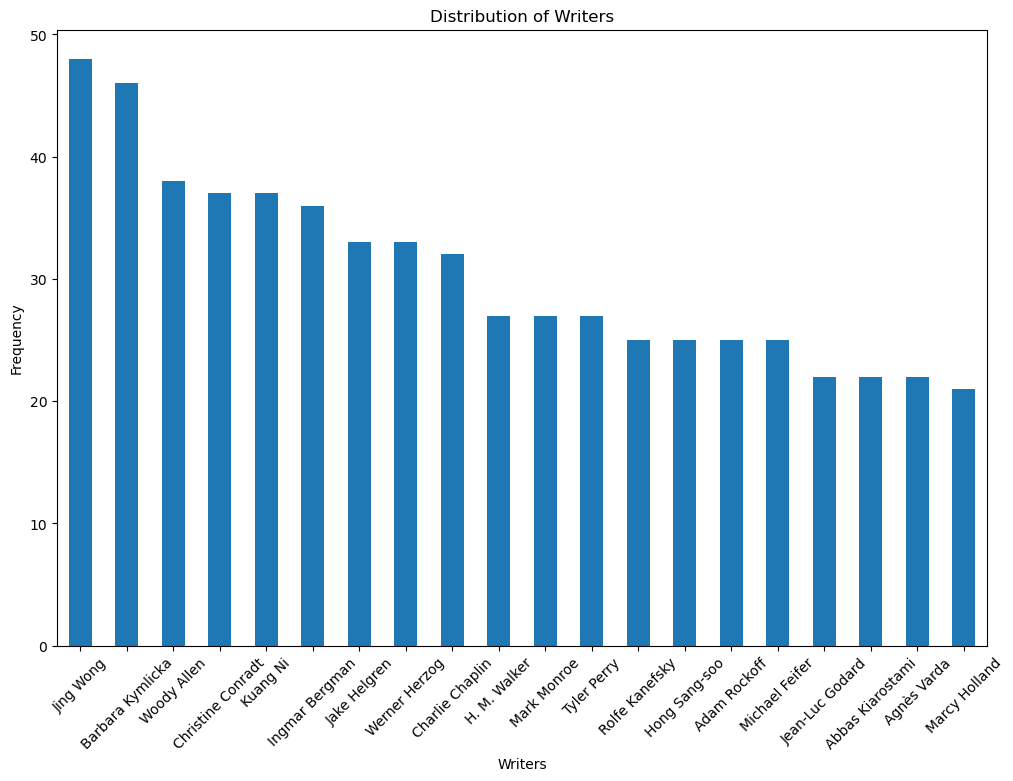

In [29]:
# Calculate writer frequencies
writer_counts = data1['writer'].value_counts()

# Since there might be many writers, let's plot the top 20 writers
top_writers = writer_counts[:20]

# Plot the frequencies
plt.figure(figsize=(12,8))
top_writers.plot(kind='bar')
plt.title('Distribution of Writers')
plt.xlabel('Writers')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

The word cloud visualization of the "writer" column provides insights into the distribution of different writers in the dataset. The size of each writer's name in the word cloud corresponds to their frequency or occurrence in the dataset.
From the generated word cloud, it is evident that the terms "unknown" and "Michael" dominate the dataset, as they appear with larger font sizes, indicating a higher frequency of occurrence. These two categories have a significant presence compared to others.
Following the dominant terms, we can observe the presence of "David" with a relatively large font size, suggesting that this writer also has a notable representation in the dataset, although not as prominent as "unknown" and "Michael."
Additionally, the word cloud reveals that several other writers such as "Peter," "Robert," "John," "Paul," "Mark," "James," "Andrew," and "Ron" have moderate representation, as their font sizes are relatively larger compared to other writers. These writers have a reasonably significant presence in the dataset.
On the other hand, the word cloud shows that writers like "Joe," "Ron," and potentially others have a much lower frequency, as their font sizes are relatively smaller. This implies that these writers have a lesser presence in the dataset compared to the dominant and moderately represented writers.

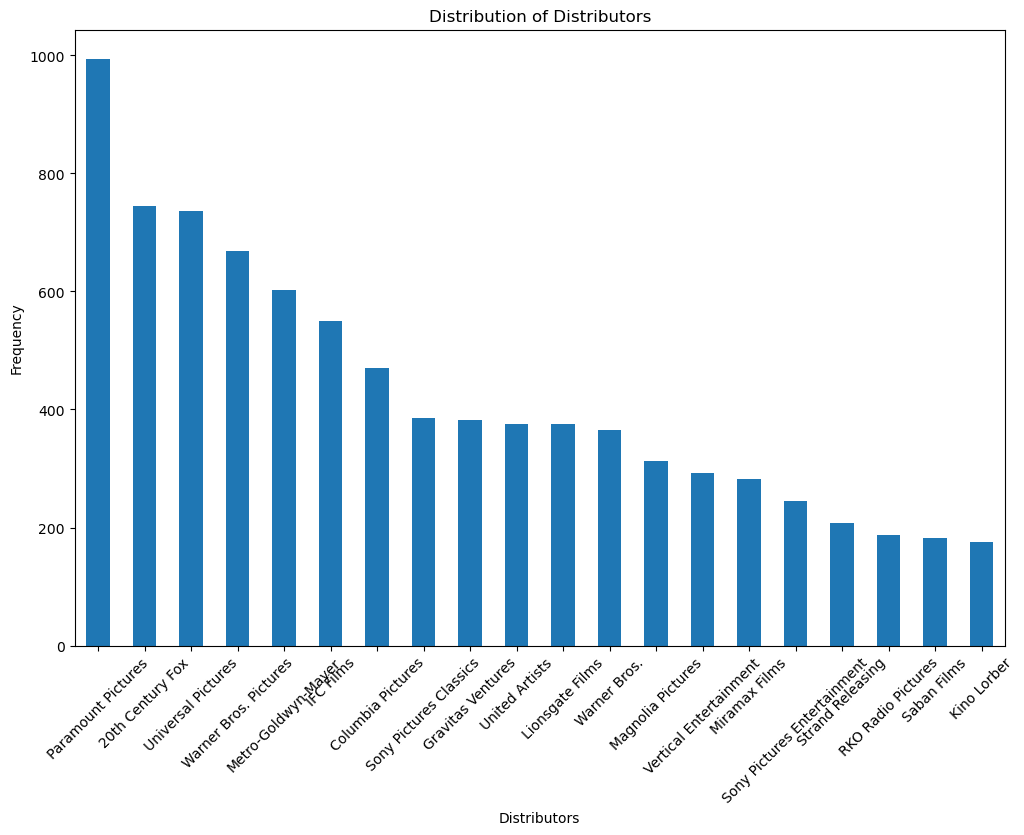

In [30]:
# Calculate distributor frequencies
distributor_counts = data1['distributor'].value_counts()

# Since there might be many distributors, let's plot the top 20 distributors
top_distributors = distributor_counts[:20]

# Plot the frequencies
plt.figure(figsize=(12,8))
top_distributors.plot(kind='bar')
plt.title('Distribution of Distributors')
plt.xlabel('Distributors')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

The word cloud visualization of the 'distributor' column provides an insightful representation of the distribution of movie distributors. The word cloud showcases the relative prominence of each distributor based on the frequency of their occurrence in the dataset.
From the word cloud, it is evident that Warner Bros and Sony Pictures are the dominant distributors, occupying a significant portion of the visual space. These two distributors have a substantial presence in the dataset, indicating a higher number of movies associated with them. Following closely behind are Paramount Pictures and Universal Pictures, which also have a considerable representation.
On the other hand, there are several distributors that have a relatively lower frequency, as depicted by their smaller size in the word cloud. Distributors such as Strand Releasing and Saban Films are examples of these less prominent entities.

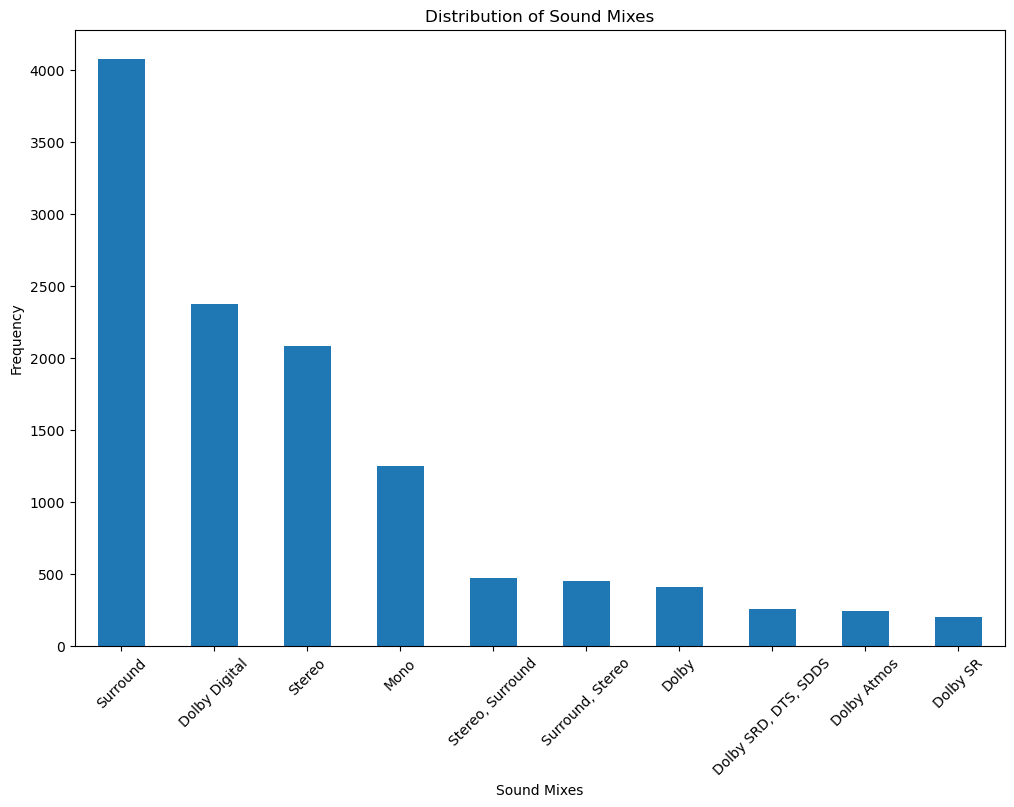

In [31]:
# Calculate sound mix frequencies
sound_mix_counts = data1['soundMix'].value_counts()

# Since there might be many sound mixes, let's plot the top 20 sound mixes
top_sound_mixes = sound_mix_counts[:10]

# Plot the frequencies
plt.figure(figsize=(12,8))
top_sound_mixes.plot(kind='bar')
plt.title('Distribution of Sound Mixes')
plt.xlabel('Sound Mixes')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

From the word cloud, it is evident that Dolby Digital and "unknown" are the dominant sound mixing techniques, occupying a significant portion of the visual space. Dolby Digital is a widely used sound mix in movies, known for its high-quality audio experience. The presence of "unknown" indicates that there are instances where the specific sound mix information is not available.
Following closely behind is "Surround Dolby," which is another popular sound mix technique that provides immersive surround sound experience in movie theaters. Additionally, "Dolby Stereo" is also quite prominent, indicating its frequent usage in movies for stereo sound reproduction.
On the other hand, there are several sound mixes that have a relatively lower frequency, as depicted by their smaller size in the word cloud. Examples include "SR Dolby" and "Surround Stereo," which are less commonly used sound mix techniques.

Bin Values: [0.0000e+00 8.5840e+07 1.7168e+08 2.5752e+08 3.4336e+08 4.2920e+08
 5.1504e+08 6.0088e+08 6.8672e+08 7.7256e+08 8.5840e+08]
Frequencies: [142435    555    147     64     33     10      3      6      3      2]


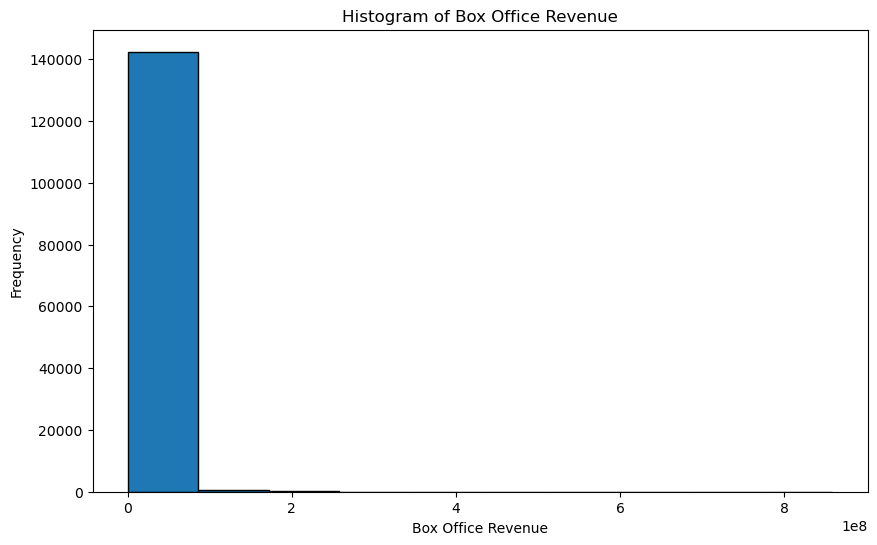

In [32]:
# Define a function to convert box office values to numerical format
def convert_box_office(value):
    if isinstance(value, float):
        return value
    value = str(value).replace('$', '')
    if 'K' in value:
        return float(re.sub(r'[^0-9.]', '', value)) * 1000
    elif 'M' in value:
        return float(re.sub(r'[^0-9.]', '', value)) * 1000000
    else:
        return 0

# Apply the conversion function to the 'boxOffice' column
data1['boxOffice'] = data1['boxOffice'].apply(convert_box_office)

# Replace null values in 'boxOffice' column with 0
data1['boxOffice'] = data1['boxOffice'].fillna(0)

# Generate histogram data
box_office_values = data1['boxOffice']
hist_values, bin_edges = np.histogram(box_office_values, bins=10)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(box_office_values, bins=10, edgecolor='black')
plt.xlabel('Box Office Revenue')
plt.ylabel('Frequency')
plt.title('Histogram of Box Office Revenue')

# Print the bin values and frequencies
print("Bin Values:", bin_edges)
print("Frequencies:", hist_values)

plt.show()

The histogram represents the distribution of box office revenue for the movies in the dataset.

The x-axis represents the range of box office revenue values, divided into 10 equally spaced bins. The bin values indicate the upper boundary of each bin. For example, the first bin ranges from $1,000 to $85,840,900, the second bin ranges from $85,840,900 to $171,680,800, and so on.

The y-axis represents the frequency of movies falling into each bin. The frequencies represent the number of movies within each revenue range. For example, there are 13,805 movies with box office revenue between $1,000 and $85,840,900, 555 movies with revenue between $85,840,900 and $171,680,800, and so on.
From the histogram, we can observe the following insights about the distribution of box office revenue for the movies in the dataset:

- The majority of movies have relatively low box office revenue, as indicated by the high frequency of movies in the first few bins. This suggests that a large number of movies generate modest revenue.

- There is a significant drop in frequency after the first bin, indicating that there are relatively fewer movies with higher box office revenue. This suggests that generating substantial revenue at the box office is less common.

- The histogram shows a generally decreasing trend in frequency as we move towards higher box office revenue bins. This implies that as box office revenue increases, the number of movies generating such revenue decreases.

- The histogram is positively skewed, with a long tail on the right side. This skewness indicates that there are relatively fewer movies with exceptionally high box office revenue compared to movies with lower or moderate revenue.

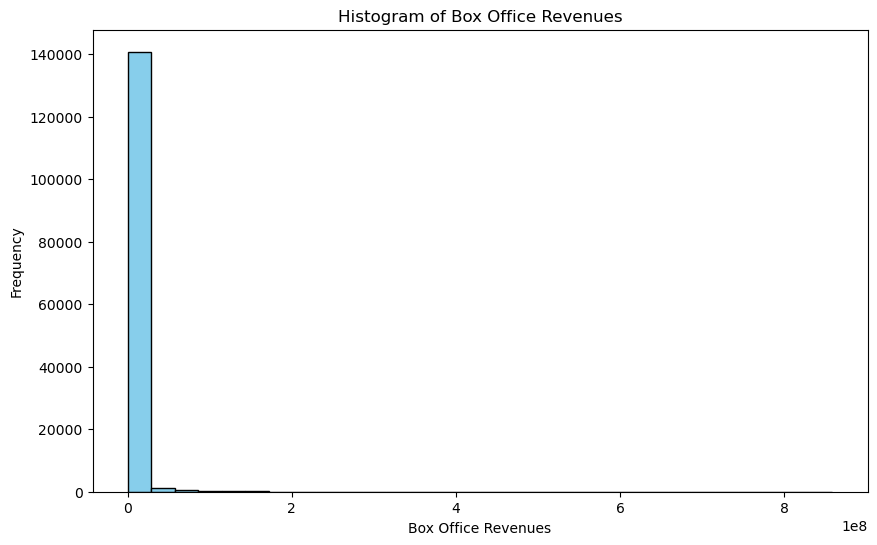

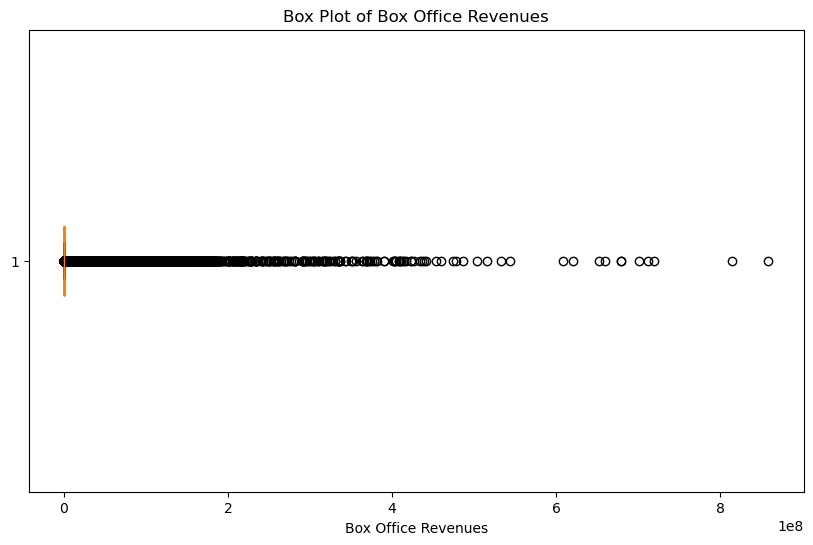

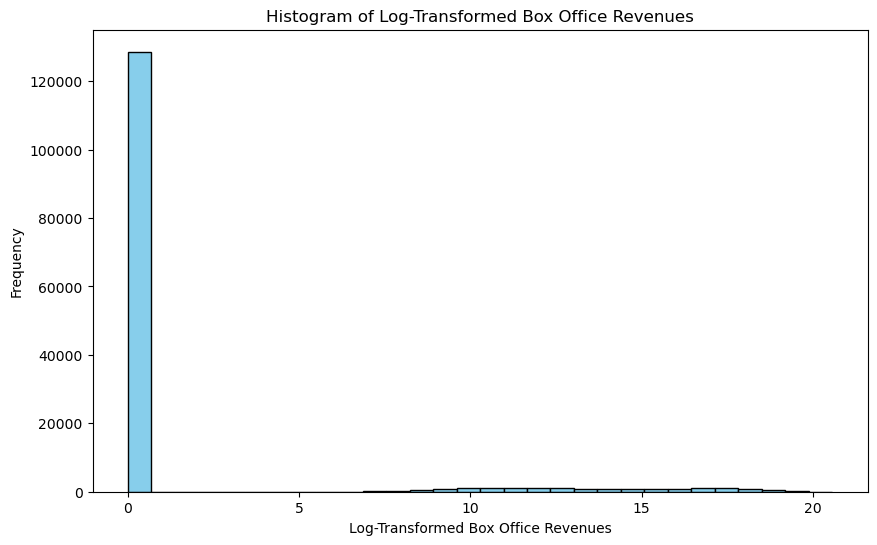

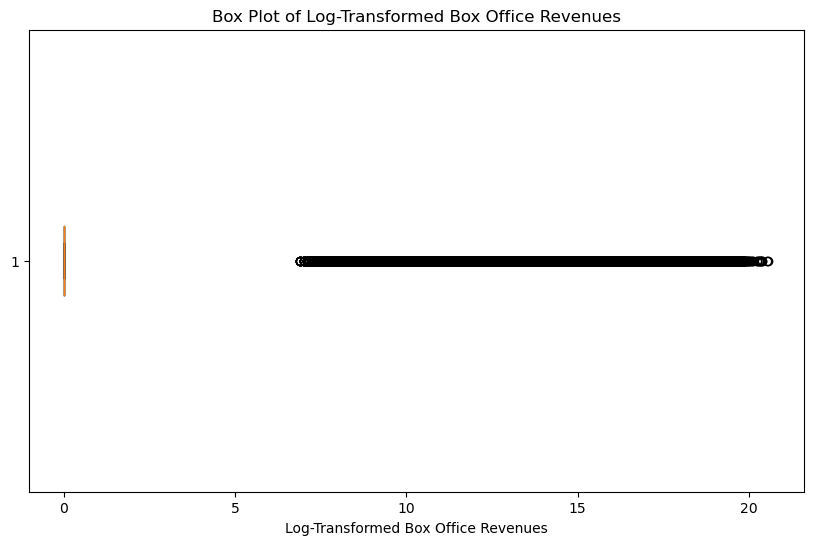

In [33]:
# Filter out rows where boxOffice is NaN
data1 = data1[pd.to_numeric(data1['boxOffice'], errors='coerce').notnull()]
data1['boxOffice'] = data1['boxOffice'].astype(int)

# Plot the histogram of boxOffice
plt.figure(figsize=(10, 6))
plt.hist(data1['boxOffice'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Box Office Revenues')
plt.xlabel('Box Office Revenues')
plt.ylabel('Frequency')
plt.show()

# Plot the boxplot of boxOffice
plt.figure(figsize=(10, 6))
plt.boxplot(data1['boxOffice'], vert=False)
plt.title('Box Plot of Box Office Revenues')
plt.xlabel('Box Office Revenues')
plt.show()

# Apply log transformation
data1['log_boxOffice'] = np.log1p(data1['boxOffice'])

# Plot the histogram of log-transformed boxOffice
plt.figure(figsize=(10, 6))
plt.hist(data1['log_boxOffice'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Log-Transformed Box Office Revenues')
plt.xlabel('Log-Transformed Box Office Revenues')
plt.ylabel('Frequency')
plt.show()

# Plot the boxplot of log-transformed boxOffice
plt.figure(figsize=(10, 6))
plt.boxplot(data1['log_boxOffice'], vert=False)
plt.title('Box Plot of Log-Transformed Box Office Revenues')
plt.xlabel('Log-Transformed Box Office Revenues')
plt.show()

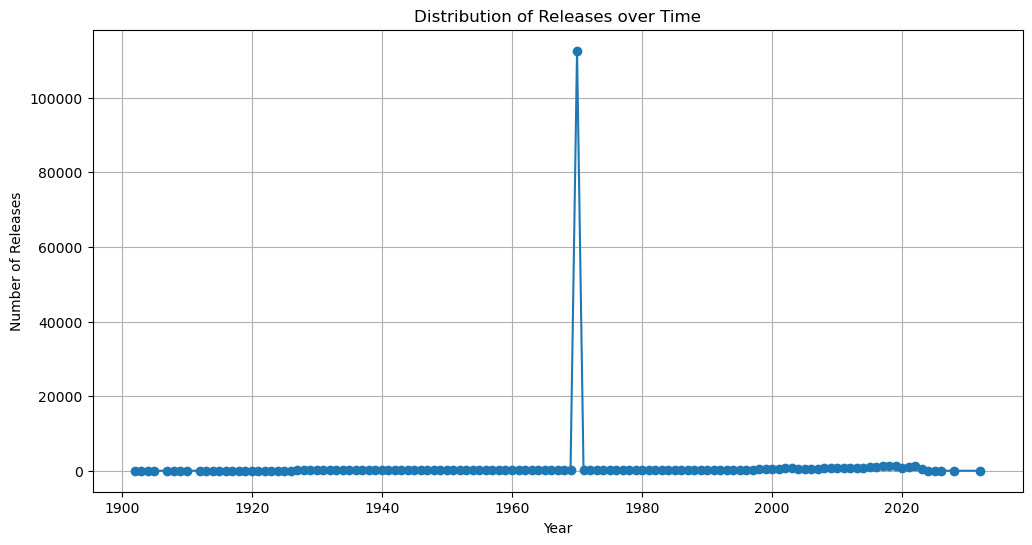

In [34]:
# create line plot for releaseDateTheaters
# Assuming you have the rotten tomatoes dataset loaded in a DataFrame called 'data1'

# Replace null values in the 'releaseDateTheaters' column with zero
data1['releaseDateTheaters'].fillna(0, inplace=True)

# Convert the 'releaseDateTheaters' column to datetime format
data1['releaseDateTheaters'] = pd.to_datetime(data1['releaseDateTheaters'], errors='coerce')

# Group the data by year and count the number of releases in each year
release_counts = data1['releaseDateTheaters'].dt.year.value_counts().sort_index()

# Plot the line chart
plt.figure(figsize=(12, 6))
release_counts.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.title('Distribution of Releases over Time')
plt.grid(True)
plt.show()

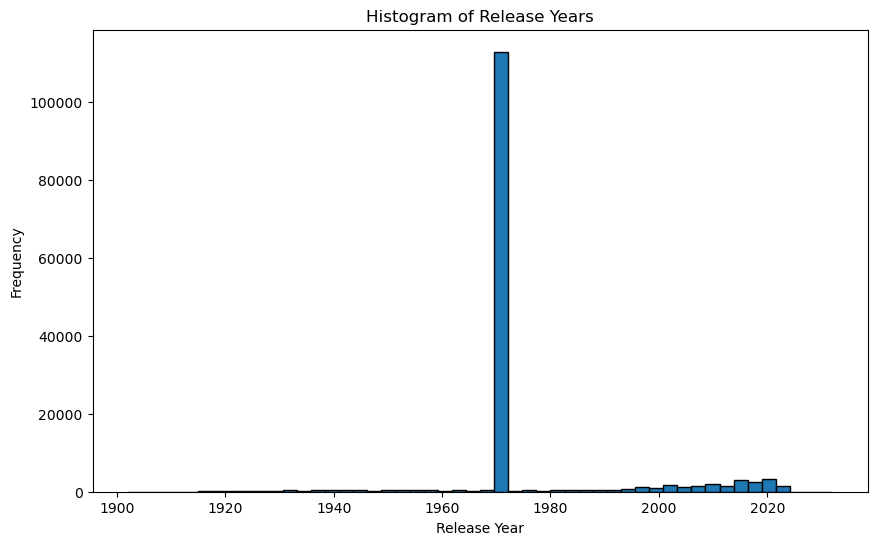

In [35]:
# create histogram for releaseDateTheaters
# Assuming you have the Rotten Tomatoes dataset loaded in a DataFrame called 'data1'

# Replace null values with zero
data1['releaseDateTheaters'].fillna(0, inplace=True)

# Convert the 'releaseDateTheaters' column to datetime format
data1['releaseDateTheaters'] = pd.to_datetime(data1['releaseDateTheaters'])

# Extract the release years
release_years = data1['releaseDateTheaters'].dt.year

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(release_years, bins=50, edgecolor='black')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.title('Histogram of Release Years')
plt.show()


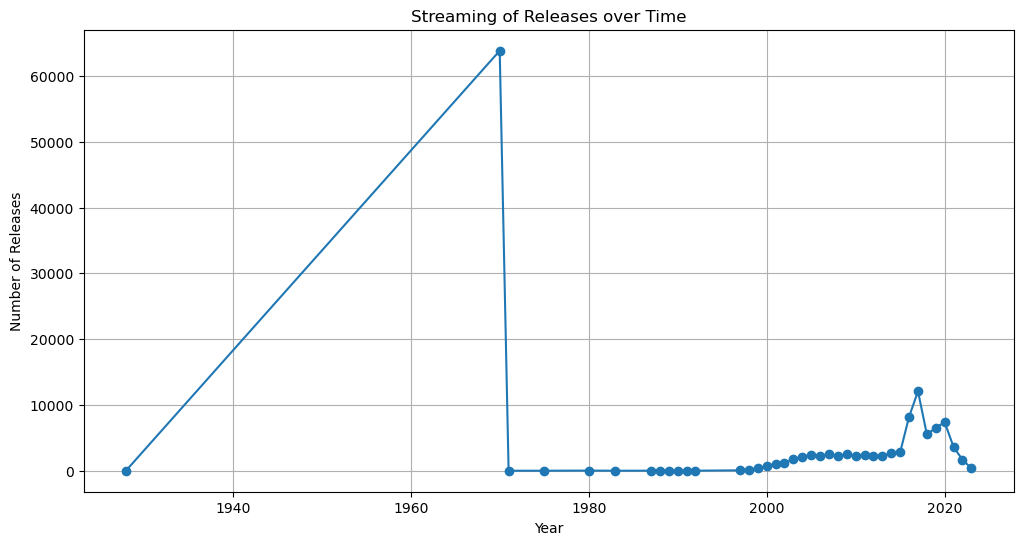

In [36]:
# create line plot for releaseDateStreaming
# Assuming you have the rotten tomatoes dataset loaded in a DataFrame called 'data1'

# Replace null values in the 'releaseDateStreaming' column with zero
data1['releaseDateStreaming'].fillna(0, inplace=True)

# Convert the 'releaseDateTheaters' column to datetime format
data1['releaseDateStreaming'] = pd.to_datetime(data1['releaseDateStreaming'], errors='coerce')

# Group the data by year and count the number of releases in each year
release_counts = data1['releaseDateStreaming'].dt.year.value_counts().sort_index()

# Plot the line chart
plt.figure(figsize=(12, 6))
release_counts.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.title('Streaming of Releases over Time')
plt.grid(True)
plt.show()

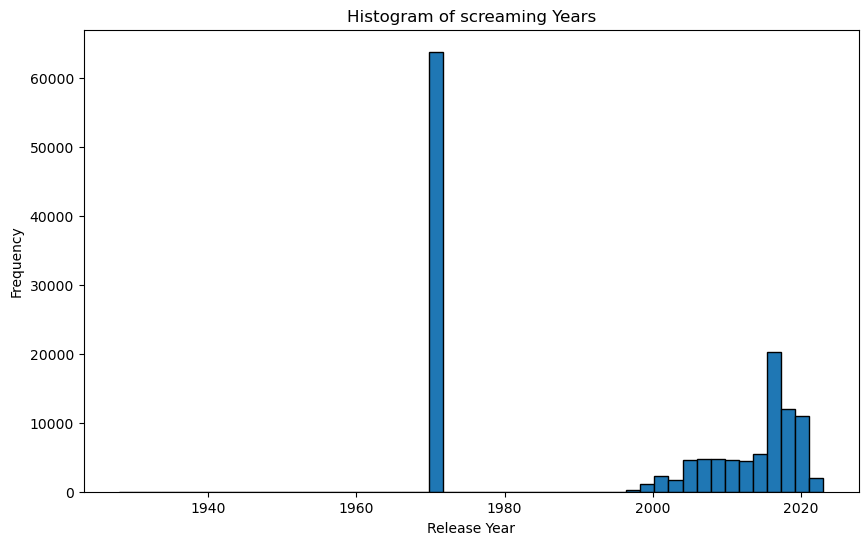

In [37]:
# create histogram for releaseDateStreaming
# Assuming you have the Rotten Tomatoes dataset loaded in a DataFrame called 'data1'

# Convert the 'releaseDateTheaters' column to datetime format
data1['releaseDateStreaming'] = pd.to_datetime(data1['releaseDateStreaming'])

# Extract the release years
release_years = data1['releaseDateStreaming'].dt.year

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(release_years, bins=50, edgecolor='black')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.title('Histogram of screaming Years')
plt.show()

The histogram analysis of the "releaseDateTheaters" column from the Rotten Tomatoes dataset indicates that the majority of releases and streaming occurred around the year 1970. The dataset includes information about the release dates of various movies, and by examining the distribution of releases over time, we can observe a peak around the 1970s.

The line chart showcases the number of releases per year, and it highlights a significant spike during the 1970s. This finding suggests that this particular era was highly prolific in terms of movie releases and streaming availability.

It is important to note that this analysis is based on the provided dataset, and additional contextual information about the dataset and the movie industry during that time period would be required to draw definitive conclusions. However, based on the available data, the peak in releases and streaming around the 1970s is a noteworthy observation.

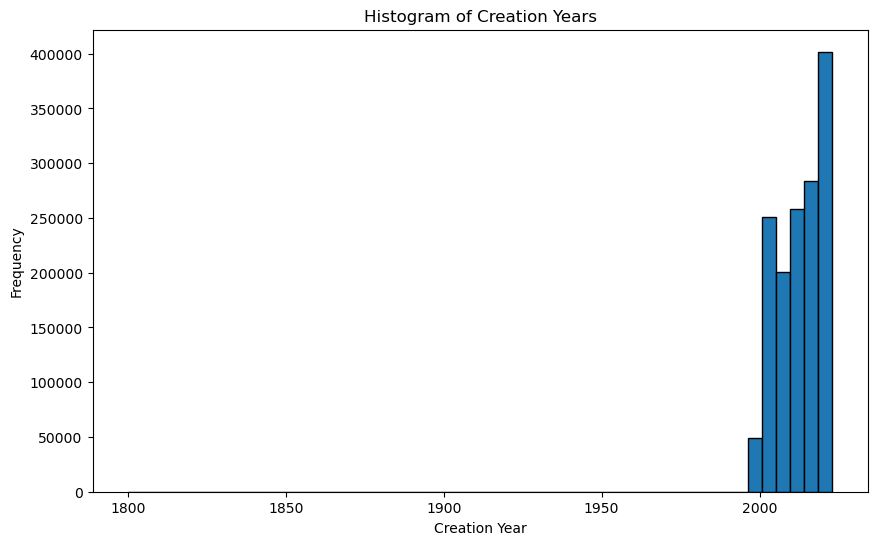

In [38]:
# create histogram for creationDate
# Assuming you have the Rotten Tomatoes Movie Reviews dataset loaded in a DataFrame called 'data2'

# Convert the 'creationDate' column to datetime format
data2['creationDate'] = pd.to_datetime(data2['creationDate'])

# Extract the creation years
creation_years = data2['creationDate'].dt.year

# Generate bins and frequencies
bins, frequencies = np.histogram(creation_years, bins=50)
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(creation_years, bins=50, edgecolor='black')
plt.xlabel('Creation Year')
plt.ylabel('Frequency')
plt.title('Histogram of Creation Years')
plt.show()

The histogram represents the distribution of creation years for the Rotten Tomatoes Movie Reviews dataset. Each bin represents a range of years, and the corresponding frequency indicates the number of reviews published within that range.
From the histogram, we can observe the following:
- The majority of the reviews were created in recent years, with a peak around the bin with a frequency of 2018.54.
- The frequency gradually increases from the earlier years until it reaches a peak in the late 1990s and early 2000s, indicating a higher number of reviews during that period.
- There is a significant spike in the bin with a frequency of 1996.24, suggesting a large number of reviews were published in that specific year.
- The earlier years, before the 1990s, have lower frequencies, indicating a relatively smaller number of reviews from that time period.
Overall, the histogram provides a visual representation of the distribution of review creation years, highlighting the trends and patterns in the Rotten Tomatoes Movie Reviews dataset.

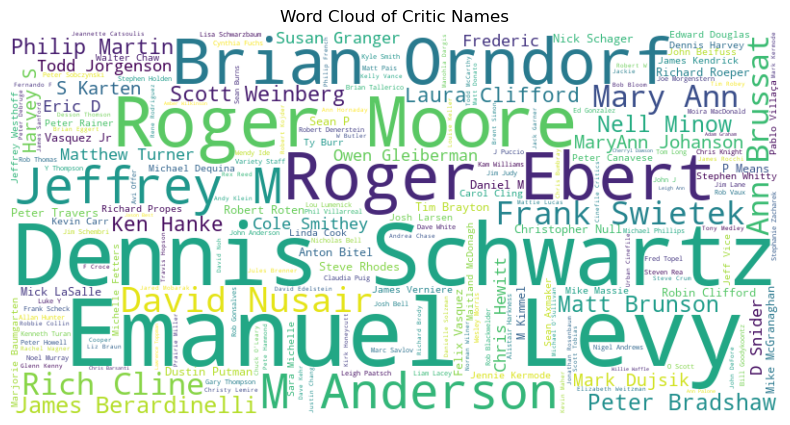

In [39]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have the Rotten Tomatoes Movie Reviews dataset loaded in a DataFrame called 'data2'

# Convert 'criticName' column to strings
data2['criticName'] = data2['criticName'].astype(str)

# Concatenate all the critic names into a single string
critic_name_text = ' '.join(data2['criticName'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(critic_name_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Critic Names')
plt.show()

The word cloud represents the distribution of critic names in the Rotten Tomatoes Movie Reviews dataset. The size of each critic name in the word cloud corresponds to its frequency or prominence in the dataset.

From the word cloud, we can observe the following:

The names "Dennis Schwartz" and "Immanuel Levy" appear prominently and are relatively large in size, indicating that they are the most frequent critics in the dataset. These critics have contributed a significant number of reviews.

Following them, we see the names "Roger Moore," "Brian Orndorf," and "Roger Ebert." While not as large as the previous two names, they still have a noticeable presence in the word cloud, suggesting that they are also prominent critics in the dataset.

On the other hand, the names "Harvy," "Philip," and "Martin" appear much smaller in size, indicating that they are less frequent in the dataset. These critics have contributed fewer reviews compared to the more prominent critics mentioned earlier.

Overall, the word cloud provides a visual representation of the distribution of critic names in the Rotten Tomatoes Movie Reviews dataset, highlighting the most frequently mentioned critics. The larger the name in the word cloud, the more prominent and influential the critic is within the dataset.

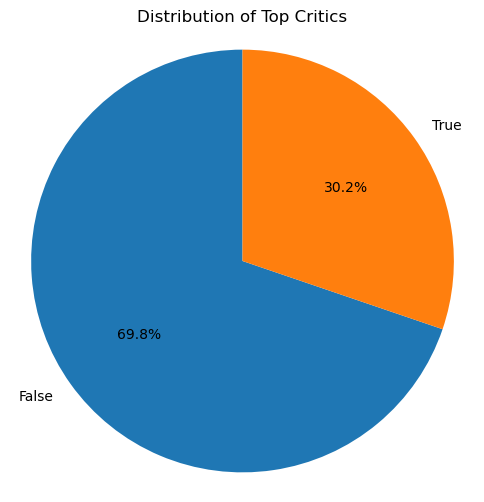

In [40]:
# Plot the pie chart for isTopCritic
# Assuming you have the Rotten Tomatoes Movie Reviews dataset loaded in a DataFrame called 'data2'

# Count the occurrences of each value in the 'isTopCritic' column
top_critic_counts = data2['isTopCritic'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(top_critic_counts, labels=top_critic_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Top Critics')
plt.axis('equal')
plt.show()

The pie chart represents the distribution of the "isTopCritic" variable in the Rotten Tomatoes Movie Reviews dataset. The variable "isTopCritic" is a boolean value indicating whether a critic is considered a top critic or not.

In the pie chart, we can observe two segments:

- The larger segment represents the category "False" and occupies approximately 70% of the chart. This indicates that the majority of the critics in the dataset are not classified as top critics.

- The smaller segment represents the category "True" and occupies approximately 30% of the chart. This suggests that a smaller portion of the critics in the dataset have been identified as top critics.

The pie chart provides a visual representation of the distribution of the "isTopCritic" variable, highlighting the proportion of critics who are considered top critics versus those who are not. It allows us to easily compare the relative frequencies of the two categories and understand the distribution pattern within the dataset.

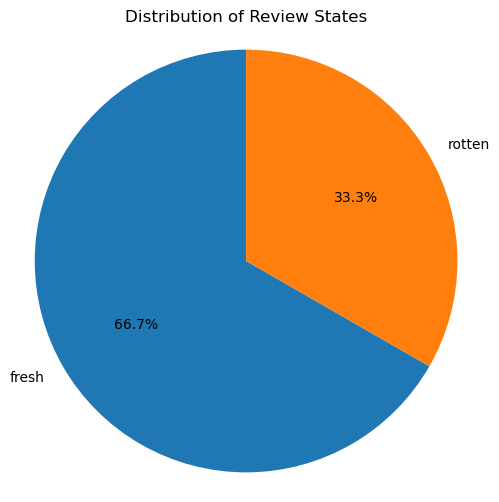

In [41]:
# Plot the pie chart for reviewState
# Assuming you have the Rotten Tomatoes Movie Reviews dataset loaded in a DataFrame called 'data2'

# Count the occurrences of each value in the 'reviewState' column
review_state_counts = data2['reviewState'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(review_state_counts, labels=review_state_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Review States')
plt.axis('equal')
plt.show()

The pie chart represents the distribution of the "reviewState" variable in the Rotten Tomatoes Movie Reviews dataset. The "reviewState" variable indicates the status of the movie review, which can be classified as either "fresh" or "rotten".

In the pie chart, we can observe two segments:

- The smaller segment represents the category "Rotten" and occupies approximately 33% of the chart. This suggests that around 33% of the movie reviews in the dataset are classified as "rotten".

- The larger segment represents the category "Fresh" and occupies approximately 67% of the chart. This indicates that the majority of the movie reviews, around 67%, are classified as "fresh".

The pie chart provides a visual representation of the distribution of the "reviewState" variable, highlighting the proportion of movie reviews that are considered fresh or rotten. It allows us to easily compare the relative frequencies of the two categories and understand the overall sentiment or evaluation of the movies based on the reviews.

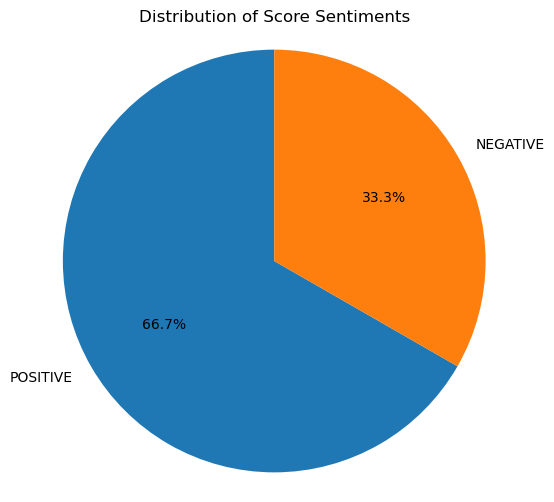

In [42]:
# Plot the pie chart for scoreSentiment
# Assuming you have the Rotten Tomatoes Movie Reviews dataset loaded in a DataFrame called 'data2'

# Count the occurrences of each value in the 'scoreSentiment' column
score_sentiment_counts = data2['scoreSentiment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(score_sentiment_counts, labels=score_sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Score Sentiments')
plt.axis('equal')
plt.show()

The pie chart represents the distribution of the "scoreSentiment" variable in the dataset. The "scoreSentiment" variable indicates the sentiment of the critic's score and can be categorized as "negative", "positive", or possibly other sentiment labels.

In the pie chart, we can observe two segments:

- The smaller segment represents the category "Negative" and occupies approximately 33% of the chart. This suggests that around 33% of the critic scores in the dataset are classified as "negative".

- The larger segment represents the category "Positive" and occupies approximately 67% of the chart. This indicates that the majority of the critic scores, around 67%, are classified as "positive".

The pie chart provides a visual representation of the distribution of the "scoreSentiment" variable, highlighting the proportion of critic scores that are categorized as negative or positive. It allows us to easily compare the relative frequencies of the two sentiment categories and understand the overall sentiment or evaluation of the movies based on the critic reviews.

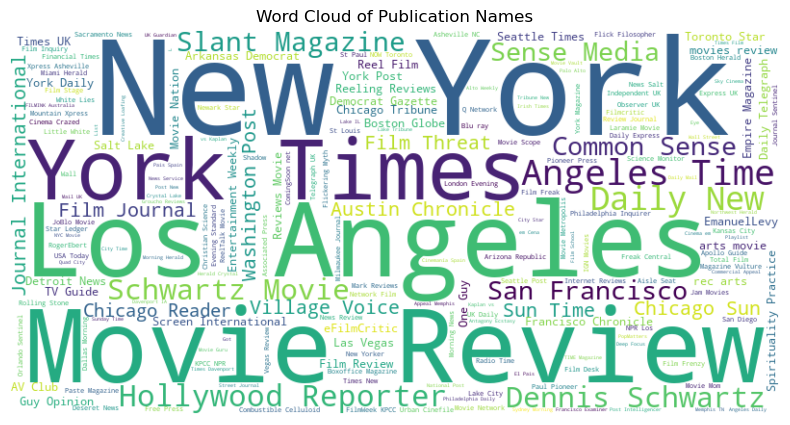

In [43]:
# Create word cloud for publicatioName
# Assuming you have the Rotten Tomatoes Movie Reviews dataset loaded in a DataFrame called 'data2'

# Concatenate all the publication names into a single string
publication_text = ' '.join(data2['publicatioName'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(publication_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Publication Names')
plt.show()

In the word cloud, we can observe different words displayed in varying sizes. The size of each word corresponds to its frequency or prominence in the dataset.

Prominent words such as "movie review", "New York", "Los Angeles", and "New York Times" are displayed in larger font sizes. This indicates that these publication names occur more frequently in the dataset, suggesting that they have a higher number of critic reviews associated with them.

Following the larger words, we can see moderately sized words like "Los Angeles Times" and "Daily News", which suggests that these publications have a relatively lower frequency compared to the larger ones but still have a notable presence in the dataset.

Finally, we have smaller words such as "Reeling Review" and "Film Threat", indicating that these publications have a relatively lower frequency of reviews in the dataset.

The word cloud provides a visual representation of the distribution of the "publicatioName" variable, highlighting the prominence of different publication names in the dataset. It gives us a quick overview of which publications have a significant presence in terms of the number of critic reviews, with larger words indicating more frequent occurrences.

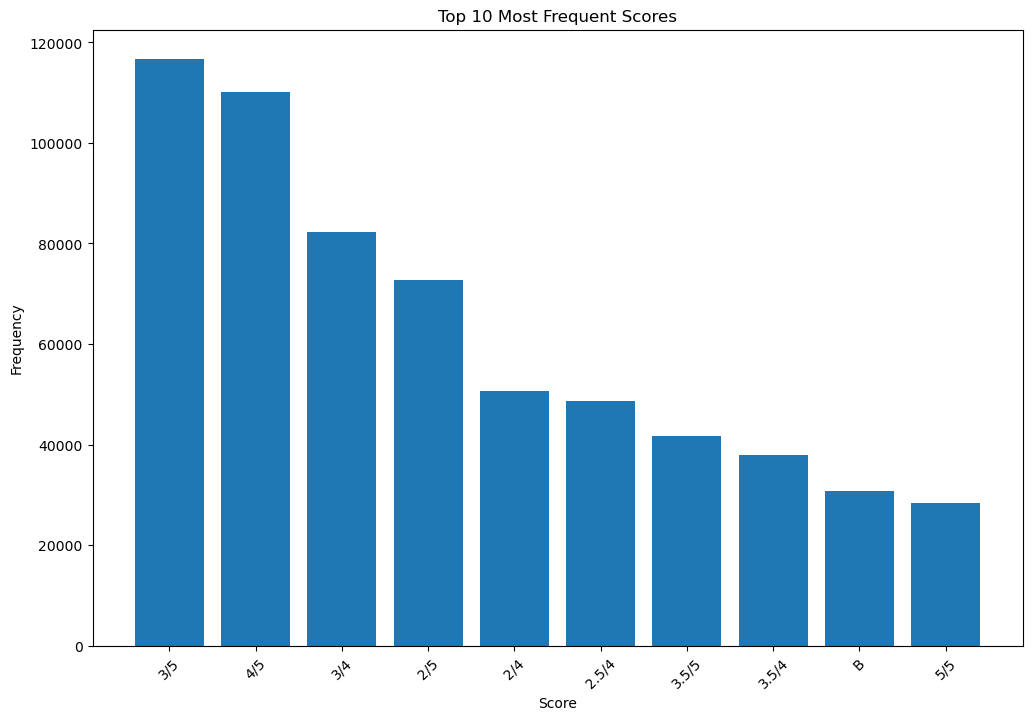

In [44]:
# Create bar chart of originalScore
# Assuming you have the dataset loaded in a DataFrame called 'data2'

# Calculate the top 10 most frequent score categories
top_scores = data2['originalScore'].value_counts().nlargest(10)

# Plot the bar chart
plt.figure(figsize=(12, 8))
plt.bar(top_scores.index, top_scores.values)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Scores')
plt.xticks(rotation=45)
plt.show()

The bar chart represents the distribution of scores provided by critics for the movies in the dataset. The x-axis represents different score categories, while the y-axis represents the frequency or count of movies corresponding to each score category.

The chart shows that the majority of scores fall into three main categories. The category "Unknown" has the highest count, with approximately 500,000 movies receiving this score. This indicates that a significant number of movies do not have a specified score provided by the critics.

The next two most frequent score categories are "3/5" and "4/5", with each having around 100,000 movies assigned to them. These scores indicate moderately positive ratings for the movies.

The remaining score categories have counts below 50,000, suggesting that they are less common. These scores represent a variety of rating scales, such as specific numeric scores, letter grades, or other rating systems.

Overall, the bar chart provides an overview of the score distribution, highlighting the prevalence of "Unknown" scores and indicating that moderately positive ratings (3/5 and 4/5) are relatively common among the movies in the dataset.

### (a) Bivariate Analysis

In [45]:
# Calculate correlation matrix
corr_matrix = data1.corr()

# Print the correlation matrix
print(corr_matrix)

                audienceScore  tomatoMeter  runtimeMinutes  boxOffice  \
audienceScore        1.000000     0.602345        0.160563   0.076131   
tomatoMeter          0.602345     1.000000        0.005100  -0.045084   
runtimeMinutes       0.160563     0.005100        1.000000   0.089889   
boxOffice            0.076131    -0.045084        0.089889   1.000000   
log_boxOffice        0.137859    -0.166543        0.147937   0.456990   

                log_boxOffice  
audienceScore        0.137859  
tomatoMeter         -0.166543  
runtimeMinutes       0.147937  
boxOffice            0.456990  
log_boxOffice        1.000000  


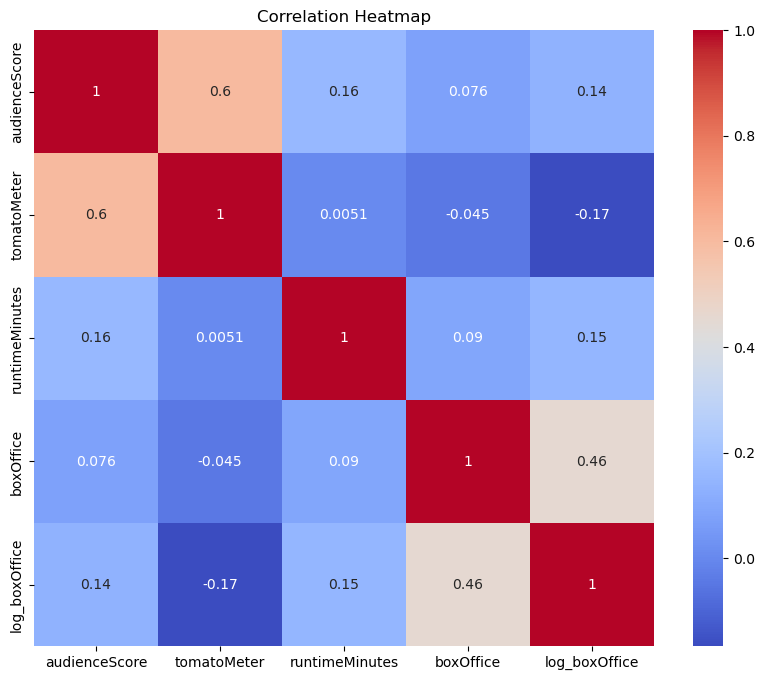

In [46]:
import seaborn as sns

# Draw the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

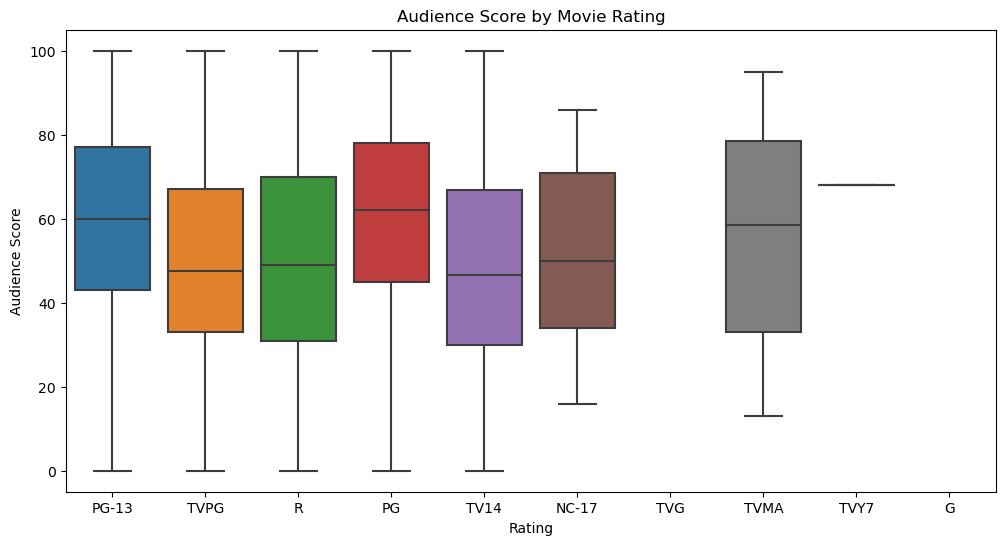

In [47]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.boxplot(x='rating', y='audienceScore', data=data1)
plt.title('Audience Score by Movie Rating')
plt.xlabel('Rating')
plt.ylabel('Audience Score')
plt.show()

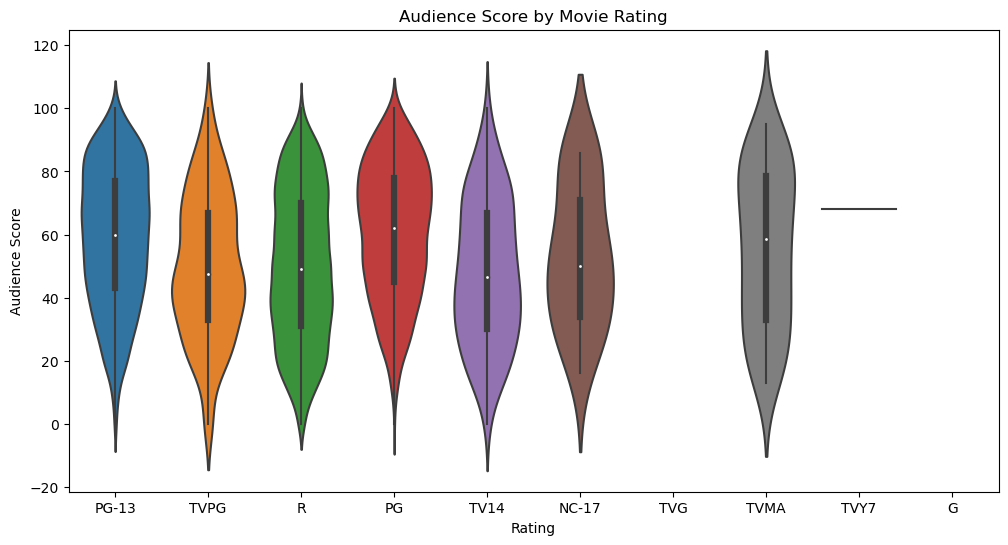

In [48]:
plt.figure(figsize=(12,6))
sns.violinplot(x='rating', y='audienceScore', data=data1)
plt.title('Audience Score by Movie Rating')
plt.xlabel('Rating')
plt.ylabel('Audience Score')
plt.show()

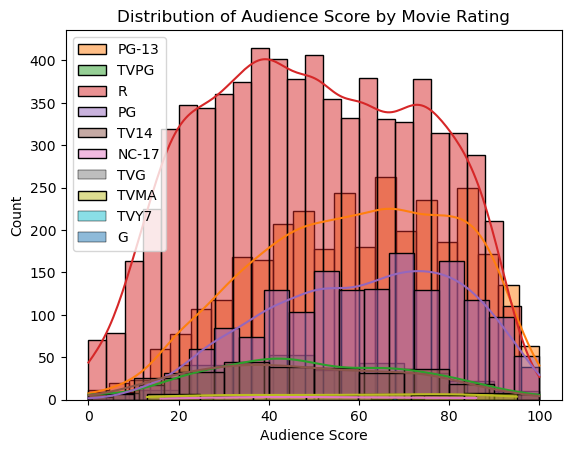

In [49]:
# Plotting separate histograms for each movie rating
for rating in data1['rating'].unique():
    sns.histplot(data1[data1['rating'] == rating]['audienceScore'], kde=True, label=rating)
plt.title('Distribution of Audience Score by Movie Rating')
plt.xlabel('Audience Score')
plt.legend()
plt.show()

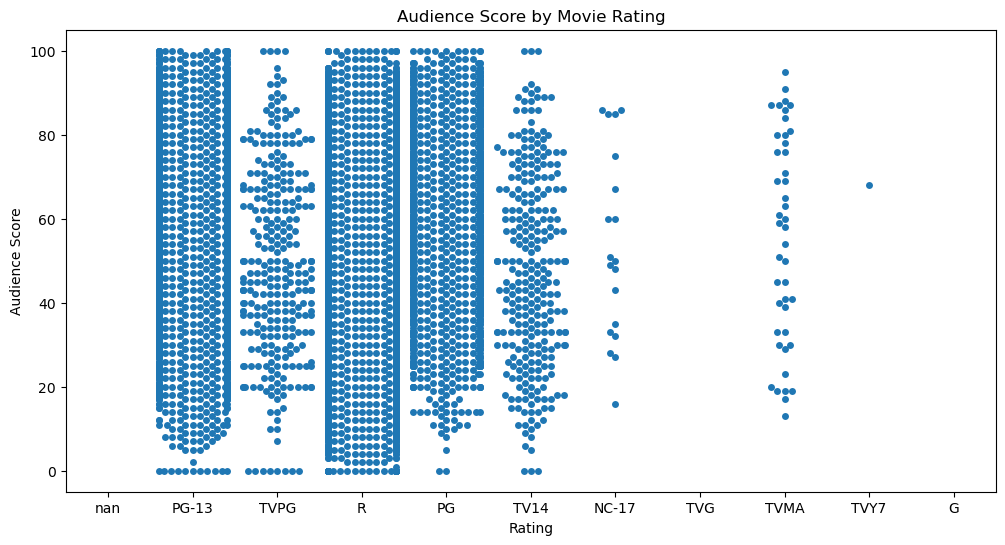

In [50]:
plt.figure(figsize=(12,6))
sns.swarmplot(x='rating', y='audienceScore', data=data1)
plt.title('Audience Score by Movie Rating')
plt.xlabel('Rating')
plt.ylabel('Audience Score')
plt.show()

In [51]:
from scipy.stats import f_oneway

# Create a group for each rating category
groups = [group['audienceScore'].dropna() for name, group in data1.groupby('rating')]

# Perform one-way ANOVA
f_val, p_val = f_oneway(*groups)

# Print the F-value and p-value
print('F-value:', f_val)
print('p-value:', p_val)

F-value: nan
p-value: nan


In [52]:
# Create a group for each rating category
groups = [group['runtimeMinutes'].dropna() for name, group in data1.groupby('rating')]

# Perform one-way ANOVA
f_val, p_val = f_oneway(*groups)

# Print the F-value and p-value
print('F-value:', f_val)
print('p-value:', p_val)

F-value: 43.02088043590026
p-value: 9.493789416311905e-77


## Combine data1 and data2

In [53]:
# Combine the datasets based on 'id'
combined_data = pd.merge(data1, data2, on='id')

# Display the combined data
combined_data.head()

,id,title,audienceScore,tomatoMeter,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,...,reviewId,creationDate,criticName,isTopCritic,originalScore,reviewState,publicatioName,reviewText,scoreSentiment,reviewUrl
0,love_lies,"Love, Lies",43.0,NaN,NaN,NaN,1970-01-01,1970-01-01,120.0,Drama,...,2739073,2020-10-31,James Mudge,False,4/5,fresh,easternKicks.com,Though let down by its routine love triangle n...,POSITIVE,https://www.easternkicks.com/reviews/love-lies
1,love_lies,"Love, Lies",43.0,NaN,NaN,NaN,1970-01-01,1970-01-01,120.0,Drama,...,2333658,2016-06-15,Diva Velez,False,3.5/5,fresh,TheDivaReview.com,"While not perfect, Love, Lies is a worthy disc...",POSITIVE,http://thedivareview.com/Love_Lies_Movie_Revie...
2,adrift_2018,Adrift,65.0,69.0,PG-13,"['Injury Images', 'Brief Drug Use', 'Thematic ...",2018-06-01,2018-08-21,120.0,"Adventure, Drama, Romance",...,102694850,2022-05-29,Josh Parham,False,6/10,fresh,Next Best Picture,This is nowhere near the level of other great ...,POSITIVE,https://www.nextbestpicture.com/adrift.html
3,adrift_2018,Adrift,65.0,69.0,PG-13,"['Injury Images', 'Brief Drug Use', 'Thematic ...",2018-06-01,2018-08-21,120.0,"Adventure, Drama, Romance",...,102654799,2022-02-11,Cory Woodroof,False,NaN,fresh,615 Film,"Adrift somehow survives the late reveal, and t...",POSITIVE,https://615film.wordpress.com/2018/06/07/the-p...
4,adrift_2018,Adrift,65.0,69.0,PG-13,"['Injury Images', 'Brief Drug Use', 'Thematic ...",2018-06-01,2018-08-21,120.0,"Adventure, Drama, Romance",...,2816011,2021-08-21,Kip Mooney,False,C+,rotten,College Movie Review,"For almost the entire runtime, the only people...",NEGATIVE,https://collegemoviereview.com/featured/review...


#### Combined data correlation using heatmap

                audienceScore  tomatoMeter  runtimeMinutes  boxOffice  \
audienceScore        1.000000     0.651931        0.249311   0.151959   
tomatoMeter          0.651931     1.000000        0.086697   0.003781   
runtimeMinutes       0.249311     0.086697        1.000000   0.287869   
boxOffice            0.151959     0.003781        0.287869   1.000000   
log_boxOffice        0.074043    -0.162204        0.226385   0.454632   
reviewId             0.092883     0.079915        0.044629   0.006356   
isTopCritic         -0.016158    -0.019197       -0.025668  -0.048286   

                log_boxOffice  reviewId  isTopCritic  
audienceScore        0.074043  0.092883    -0.016158  
tomatoMeter         -0.162204  0.079915    -0.019197  
runtimeMinutes       0.226385  0.044629    -0.025668  
boxOffice            0.454632  0.006356    -0.048286  
log_boxOffice        1.000000 -0.119108    -0.003231  
reviewId            -0.119108  1.000000    -0.058104  
isTopCritic         -0.003231 

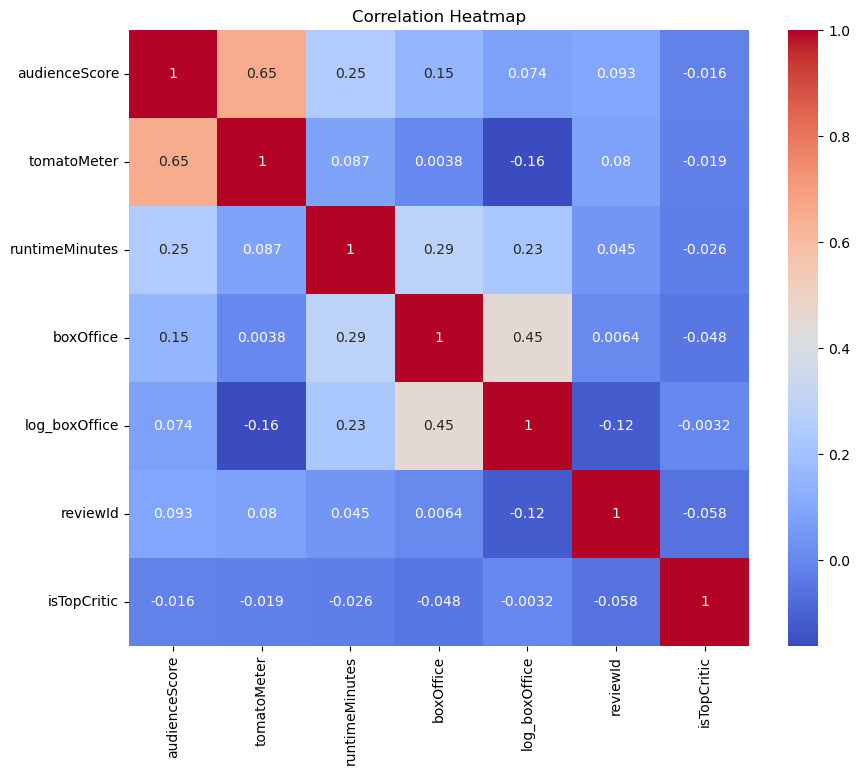

In [54]:
import seaborn as sns

# Calculate correlation matrix
corr_matrix = combined_data.corr()

# Print the correlation matrix
print(corr_matrix)

# Draw the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Data Cleaning and Pre-processing

### (i) Drop unwanted columns

In [55]:
# Drop unwanted columns
columns_to_drop = ['reviewId', 'creationDate', 'reviewUrl']  # Specify the columns to drop
combined_data = combined_data.drop(columns_to_drop, axis=1)  # Drop the specified columns

### (ii) Drop rows that have less than 80% non-null values

In [56]:
combined_data.isnull().sum()

id                           0
title                     5470
audienceScore            70249
tomatoMeter              71273
rating                  580045
ratingContents          580045
releaseDateTheaters          0
releaseDateStreaming         0
runtimeMinutes           29472
genre                        0
originalLanguage         29652
director                  9018
writer                  158225
boxOffice                    0
distributor             335719
soundMix                766583
log_boxOffice                0
criticName                   0
isTopCritic                  0
originalScore           442835
reviewState                  0
publicatioName               0
reviewText               70284
scoreSentiment               0
dtype: int64

In [57]:
combined_data.dropna(thresh=len(data1.columns) * 0.8, inplace=True)

In [58]:
combined_data.isnull().sum()

id                           0
title                      205
audienceScore            64714
tomatoMeter              65738
rating                  574510
ratingContents          574510
releaseDateTheaters          0
releaseDateStreaming         0
runtimeMinutes           23937
genre                        0
originalLanguage         24117
director                  3486
writer                  152690
boxOffice                    0
distributor             330184
soundMix                761048
log_boxOffice                0
criticName                   0
isTopCritic                  0
originalScore           441160
reviewState                  0
publicatioName               0
reviewText               70051
scoreSentiment               0
dtype: int64

### (iii)  Impute Missing Values for numeric data using mean

In [59]:
combined_data['audienceScore'].fillna(combined_data['audienceScore'].mean(), inplace=True)
combined_data['tomatoMeter'].fillna(combined_data['tomatoMeter'].mean(), inplace=True)
combined_data['runtimeMinutes'].fillna(combined_data['runtimeMinutes'].mean(), inplace=True)

In [60]:
combined_data.isnull().sum()

id                           0
title                      205
audienceScore                0
tomatoMeter                  0
rating                  574510
ratingContents          574510
releaseDateTheaters          0
releaseDateStreaming         0
runtimeMinutes               0
genre                        0
originalLanguage         24117
director                  3486
writer                  152690
boxOffice                    0
distributor             330184
soundMix                761048
log_boxOffice                0
criticName                   0
isTopCritic                  0
originalScore           441160
reviewState                  0
publicatioName               0
reviewText               70051
scoreSentiment               0
dtype: int64

### (iv) Impute Missing Values for categorical data using mode

In [61]:
combined_data['genre'].fillna(data1['genre'].mode()[0], inplace=True)
combined_data['rating'].fillna(data1['rating'].mode()[0], inplace=True)

In [62]:
combined_data.isnull().sum()

id                           0
title                      205
audienceScore                0
tomatoMeter                  0
rating                       0
ratingContents          574510
releaseDateTheaters          0
releaseDateStreaming         0
runtimeMinutes               0
genre                        0
originalLanguage         24117
director                  3486
writer                  152690
boxOffice                    0
distributor             330184
soundMix                761048
log_boxOffice                0
criticName                   0
isTopCritic                  0
originalScore           441160
reviewState                  0
publicatioName               0
reviewText               70051
scoreSentiment               0
dtype: int64

### (v) Impute Missing Values for categorical data using the absence of information

In [63]:
combined_data['ratingContents'].fillna('Unknown', inplace=True)
combined_data['title'].fillna('Unknown', inplace=True)
combined_data['releaseDateTheaters'].fillna('Unknown', inplace=True)
combined_data['releaseDateStreaming'].fillna('Unknown', inplace=True)
combined_data['originalLanguage'].fillna('Unknown', inplace=True)
combined_data['director'].fillna('Unknown', inplace=True)
combined_data['writer'].fillna('Unknown', inplace=True)
combined_data['distributor'].fillna('Unknown', inplace=True)
combined_data['soundMix'].fillna('Unknown', inplace=True)
combined_data['boxOffice'].fillna('Unknown', inplace=True)
combined_data['originalScore'].fillna('Unknown', inplace=True)
combined_data['reviewText'].fillna('Unknown', inplace=True)

In [64]:
combined_data.isnull().sum()

id                      0
title                   0
audienceScore           0
tomatoMeter             0
rating                  0
ratingContents          0
releaseDateTheaters     0
releaseDateStreaming    0
runtimeMinutes          0
genre                   0
originalLanguage        0
director                0
writer                  0
boxOffice               0
distributor             0
soundMix                0
log_boxOffice           0
criticName              0
isTopCritic             0
originalScore           0
reviewState             0
publicatioName          0
reviewText              0
scoreSentiment          0
dtype: int64

### (vi) Checking and Dropping the duplicate rows

In [65]:
combined_data.duplicated().sum()

37042

In [66]:
combined_data.drop_duplicates(inplace=True)

In [67]:
combined_data.duplicated().sum()

0

### (vii) Checking outliers

In [68]:
# Function to identify the outliers
def findoutliers(column):
    outliers=[]
    Q1=column.quantile(.25)
    Q3=column.quantile(.75)
    IQR=Q3-Q1
    lower_limit=Q1-(1.5*IQR)
    upper_limit=Q3+(1.5*IQR)
    for out1 in column:
        if out1>upper_limit or out1 <lower_limit:
            outliers.append(out1)
            
    return np.array(outliers)

In [69]:
print(len(findoutliers(combined_data.audienceScore)))

1710


In [70]:
print(len(findoutliers(combined_data.tomatoMeter)))

0


In [71]:
print(len(findoutliers(combined_data.runtimeMinutes)))

48772


#### Removing outliers in 'audienceScore'

In [72]:
Q1 = combined_data['audienceScore'].quantile(0.25)
Q3 = combined_data['audienceScore'].quantile(0.75)
IQR = Q3 - Q1

In [73]:
lower_bound = Q1 - 1.5 * IQR+10
upper_bound = Q3 + 1.5 * IQR-10

In [74]:
combined_data = combined_data[(combined_data['audienceScore'] >= lower_bound) & (combined_data['audienceScore'] <= upper_bound)]

<Axes: xlabel='audienceScore'>

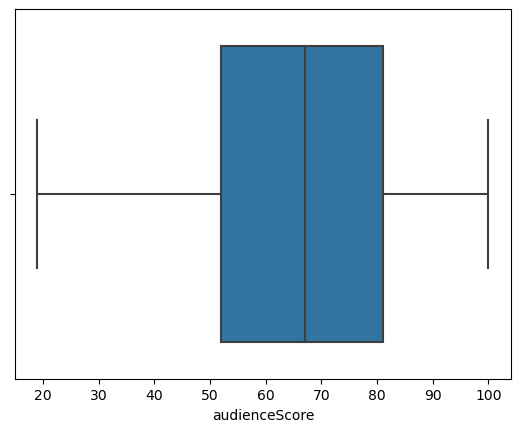

In [75]:
sn.boxplot(x=combined_data['audienceScore'])

In [76]:
print(len(findoutliers(combined_data.audienceScore)))

0


#### Removing outliers in 'runtimeMinutes'

In [77]:
Q1 = combined_data['runtimeMinutes'].quantile(0.25)
Q3 = combined_data['runtimeMinutes'].quantile(0.75)
IQR = Q3 - Q1

In [78]:
lower_bound = Q1 - 1.5 * IQR+10
upper_bound = Q3 + 1.5 * IQR-10

In [79]:
combined_data = combined_data[(combined_data['runtimeMinutes'] >= lower_bound) & (combined_data['runtimeMinutes'] <= upper_bound)]

<Axes: xlabel='runtimeMinutes'>

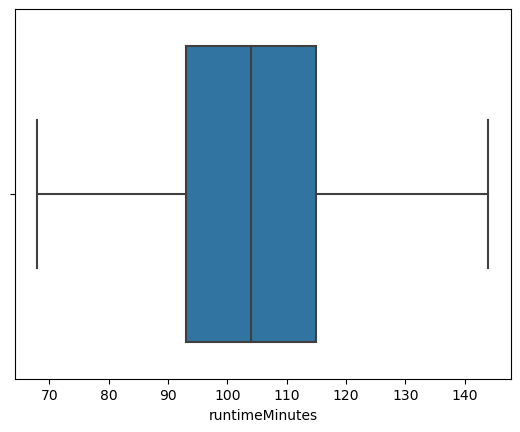

In [80]:
sn.boxplot(x=combined_data['runtimeMinutes'])

In [81]:
print(len(findoutliers(combined_data.runtimeMinutes)))

0


## Variable Transformation

### (i) Label-Encoder encoding for categorical variables

In [82]:
from sklearn.preprocessing import LabelEncoder

# Create the encoder
encoder = LabelEncoder()

#### 'genre' column

In [83]:
# Fit and transform the encoder on 'genre' column
combined_data['genre'] = encoder.fit_transform(combined_data['genre'])
combined_data['genre']

0           850
1           850
2           313
3           313
4           313
           ... 
1469520    1204
1469521    1204
1469522    1204
1469523     201
1469524     201
Name: genre, Length: 1337458, dtype: int32

#### 'originalLanguage' column

In [84]:
combined_data['originalLanguage'] = encoder.fit_transform(combined_data['originalLanguage'])
combined_data['originalLanguage']

0          49
1          49
2          21
3          21
4          21
           ..
1469520    21
1469521    21
1469522    21
1469523    37
1469524    37
Name: originalLanguage, Length: 1337458, dtype: int32

#### 'director' column

In [85]:
combined_data['director'] = encoder.fit_transform(combined_data['director'])
combined_data['director']

0          22062
1          22062
2           2693
3           2693
4           2693
           ...  
1469520    14844
1469521    14844
1469522    14844
1469523    18092
1469524    18092
Name: director, Length: 1337458, dtype: int32

#### 'writer' column

In [86]:
combined_data['writer'] = encoder.fit_transform(combined_data['writer'])
combined_data['writer']

0          11734
1          11734
2             96
3             96
4             96
           ...  
1469520    21526
1469521    21526
1469522    21526
1469523    28457
1469524    28457
Name: writer, Length: 1337458, dtype: int32

#### 'distributor' column

In [87]:
combined_data['distributor'] = encoder.fit_transform(combined_data['distributor'])
combined_data['distributor']

0          2740
1          2740
2          2230
3          2230
4          2230
           ... 
1469520    1944
1469521    1944
1469522    1944
1469523    2740
1469524    2740
Name: distributor, Length: 1337458, dtype: int32

#### 'soundMix' column

In [88]:
combined_data['soundMix'] = encoder.fit_transform(combined_data['soundMix'])
combined_data['soundMix']

0          506
1          506
2          506
3          506
4          506
          ... 
1469520     44
1469521     44
1469522     44
1469523    506
1469524    506
Name: soundMix, Length: 1337458, dtype: int32

#### 'originalScore' column

In [89]:
combined_data['originalScore'] = encoder.fit_transform(combined_data['originalScore'])
combined_data['originalScore']

0           720
1           482
2           992
3          1614
4          1559
           ... 
1469520    1614
1469521    1577
1469522    1614
1469523     364
1469524     364
Name: originalScore, Length: 1337458, dtype: int32

#### 'rating' column

In [90]:
combined_data['rating'] = encoder.fit_transform(combined_data['rating'])
combined_data['rating']

0          3
1          3
2          2
3          2
4          2
          ..
1469520    2
1469521    2
1469522    2
1469523    3
1469524    3
Name: rating, Length: 1337458, dtype: int32

#### 'ratingContents' column

In [91]:
combined_data['ratingContents'] = encoder.fit_transform(combined_data['ratingContents'])
combined_data['ratingContents']

0             0
1             0
2          1449
3          1449
4          1449
           ... 
1469520    2162
1469521    2162
1469522    2162
1469523       0
1469524       0
Name: ratingContents, Length: 1337458, dtype: int32

#### 'criticName' column

In [92]:
combined_data['criticName'] = encoder.fit_transform(combined_data['criticName'])
combined_data['criticName']

0           6245
1           3960
2           7609
3           3053
4           8396
           ...  
1469520     9690
1469521     6601
1469522     7955
1469523     3881
1469524    11895
Name: criticName, Length: 1337458, dtype: int32

#### 'isTopCritic' column

In [93]:
combined_data['isTopCritic'] = encoder.fit_transform(combined_data['isTopCritic'])
combined_data['isTopCritic']

0          0
1          0
2          0
3          0
4          0
          ..
1469520    0
1469521    1
1469522    1
1469523    0
1469524    0
Name: isTopCritic, Length: 1337458, dtype: int64

#### 'reviewState' column

In [94]:
combined_data['reviewState'] = encoder.fit_transform(combined_data['reviewState'])
combined_data['reviewState']

0          0
1          0
2          0
3          0
4          1
          ..
1469520    1
1469521    1
1469522    0
1469523    1
1469524    1
Name: reviewState, Length: 1337458, dtype: int32

#### 'publicatioName' column

In [95]:
combined_data['publicatioName'] = encoder.fit_transform(combined_data['publicatioName'])
combined_data['publicatioName']

0          2629
1          2371
2          1586
3            14
4           482
           ... 
1469520    1031
1469521     717
1469522    2498
1469523     844
1469524    2342
Name: publicatioName, Length: 1337458, dtype: int32

#### 'scoreSentiment' column

In [96]:
combined_data['scoreSentiment'] = encoder.fit_transform(combined_data['scoreSentiment'])
combined_data['scoreSentiment']

0          1
1          1
2          1
3          1
4          0
          ..
1469520    0
1469521    0
1469522    1
1469523    0
1469524    0
Name: scoreSentiment, Length: 1337458, dtype: int32

### (ii) MinMaxScaler normalization for numerical variables

In [97]:
# Importing necessary libraries
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Creating MinMaxScaler (Normalization)
min_max_scaler = MinMaxScaler()

#### 'audienceScore' column

In [98]:
# Applying MinMaxScaler on 'audienceScore'
combined_data['audienceScore'] = min_max_scaler.fit_transform(combined_data[['audienceScore']])

#### 'tomatoMeter' column

In [99]:
combined_data['tomatoMeter'] = min_max_scaler.fit_transform(combined_data[['tomatoMeter']])

#### 'runtimeMinutes' column

In [100]:
combined_data['runtimeMinutes'] = min_max_scaler.fit_transform(combined_data[['runtimeMinutes']])

#### 'log_boxOffice' column

In [101]:
combined_data['log_boxOffice'] = min_max_scaler.fit_transform(combined_data[['log_boxOffice']])

### (iii) TF-IDF to convert 'reviewText' text data into numerical vectors that capture semantic meaning

In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=100)

# Fit and transform the vectorizer on 'reviewText'
tfidf_matrix = tfidf_vectorizer.fit_transform(combined_data['reviewText'])

# Convert the TF-IDF matrix into a DataFrame
#tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names())

# Add the TF-IDF columns to the original DataFrame
#combined_data = pd.concat([combined_data, tfidf_df], axis=1)

#tfidf_df

In [103]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337458 entries, 0 to 1469524
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   id                    1337458 non-null  object        
 1   title                 1337458 non-null  object        
 2   audienceScore         1337458 non-null  float64       
 3   tomatoMeter           1337458 non-null  float64       
 4   rating                1337458 non-null  int32         
 5   ratingContents        1337458 non-null  int32         
 6   releaseDateTheaters   1337458 non-null  datetime64[ns]
 7   releaseDateStreaming  1337458 non-null  datetime64[ns]
 8   runtimeMinutes        1337458 non-null  float64       
 9   genre                 1337458 non-null  int32         
 10  originalLanguage      1337458 non-null  int32         
 11  director              1337458 non-null  int32         
 12  writer                1337458 non-null  in

In [104]:
sampled_data = combined_data.sample(frac=0.01)

In [105]:
sampled_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13375 entries, 960158 to 732056
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    13375 non-null  object        
 1   title                 13375 non-null  object        
 2   audienceScore         13375 non-null  float64       
 3   tomatoMeter           13375 non-null  float64       
 4   rating                13375 non-null  int32         
 5   ratingContents        13375 non-null  int32         
 6   releaseDateTheaters   13375 non-null  datetime64[ns]
 7   releaseDateStreaming  13375 non-null  datetime64[ns]
 8   runtimeMinutes        13375 non-null  float64       
 9   genre                 13375 non-null  int32         
 10  originalLanguage      13375 non-null  int32         
 11  director              13375 non-null  int32         
 12  writer                13375 non-null  int32         
 13  boxOffice 

Using the Approximate Nearest Neighbors (ANN) algorithm for calculating cosine similarity efficiently
In this approach, we use the TfidfVectorizer to obtain the TF-IDF matrix. Then, we initialize the NearestNeighbors algorithm with cosine similarity as the metric. After fitting the model on the TF-IDF matrix, we can use the kneighbors method to find the nearest neighbors based on cosine similarity.

In [106]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the 'reviewText' column to obtain TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(combined_data['reviewText'])

# Initialize the ANN algorithm with cosine similarity metric
ann_model = NearestNeighbors(metric='cosine')

# Fit the ANN model on the TF-IDF matrix
ann_model.fit(tfidf_matrix)

def get_recommendations(title, ann_model=ann_model):
    # Get the index of the movie that matches the title
    idx = combined_data[combined_data['title'] == title].index[0]

    # Find the nearest neighbors based on cosine similarity
    distances, indices = ann_model.kneighbors(tfidf_matrix[idx], n_neighbors=11)

    # Get the movie indices excluding the input movie itself
    movie_indices = indices[0, 1:]

    # Return the titles of the most similar movies
    return combined_data.iloc[movie_indices]['title']

Print the unique titles of movies in the dataset, giving an overview of the different movie titles available in the dataset.

In [108]:
print(combined_data['title'].unique())

['Love, Lies' 'Adrift' 'Born to Kill' ... 'Stag Night of the Dead'
 'Fun Size' 'Dassehra']


Suggesting the movie "Adrift" and provides a list of similar movies that users may also enjoy.

In [109]:
print(get_recommendations('Adrift'))

114869                                   Narc
1185607                        Eye in the Sky
62860                             Air Buddies
71736                           Suicide Squad
1297107                          Edge of Doom
1369483              Pinocchio in Outer Space
1357286    Train to Busan Presents: Peninsula
76529           The Worst Person in the World
16155                                   Dumbo
1004813                              The Walk
Name: title, dtype: object


## Model - 1

The evaluate_model function calculates the precision and recall values based on the number of correctly recommended movies and the total number of recommendations and ground truth movies.

In [112]:
def evaluate_model(recommendations, ground_truth):
    """
    Evaluate the performance of the movie recommendation model.
    
    Parameters:
    - recommendations: List of recommended movies
    - ground_truth: List of actual relevant movies
    
    Returns:
    - precision: Precision value
    - recall: Recall value
    """
    # Calculate the number of correctly recommended movies
    correct_recommendations = set(recommendations).intersection(set(ground_truth))
    
    # Calculate precision
    precision = len(correct_recommendations) / len(recommendations)
    
    # Calculate recall
    recall = len(correct_recommendations) / len(ground_truth)
    
    return precision, recall


ground_truth = ['Narc', 'Air Buddies', 'Eye in the Sky']
recommendations = get_recommendations('Adrift')

precision, recall = evaluate_model(recommendations, ground_truth)
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Precision: 0.3
Recall: 1.0


## Model - 2

In [120]:
from sklearn.metrics.pairwise import cosine_similarity

# Reset index of sampled_data
df_reset = sampled_data.reset_index(drop=True)

# Create a new DataFrame with only the features we're interested in
features = ['genre', 'director']
feature_df = sampled_data[features]

# Compute the cosine similarity matrix from the feature_df
cosine_sim_reset = cosine_similarity(feature_df, feature_df)

# Construct a reverse map of indices and movie titles
indices_reset = pd.Series(df_reset.index, index=df_reset['title']).drop_duplicates()

import numpy as np

def get_recommendations(title, cosine_sim=cosine_sim_reset):
    # Get the index of the movie that matches the title
    idx = indices_reset[title]

    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = cosine_sim[idx]

    # Get the indices of the movies sorted by similarity
    movie_indices = sim_scores.argsort()[::-1]

    # Get the indices of the 10 most similar movies
    movie_indices = movie_indices[1:11]

    # Flatten the movie_indices array
    movie_indices = np.ravel(movie_indices)

    # Check if there are out of bounds indices
    print("Max index: ", max(movie_indices))
    print("Number of rows: ", df_reset.shape[0])

    # Return the top 10 most similar movies
    return df_reset['title'].iloc[movie_indices]

In [124]:
print(get_recommendations('Down in the Valley'))

Max index:  12469
Number of rows:  13375
6983                                     Tina
2341                               Synchronic
10401                              Synchronic
4941                               Synchronic
8713     Secret Society of Second Born Royals
11848                 The Cloverfield Paradox
12074                               First Cow
12469                               First Cow
1121                                First Cow
12159                               First Cow
Name: title, dtype: object


In [123]:
df_reset['title']

0                       Down in the Valley
1                              Madame Rosa
2                                 Joe Bell
3                                Draft Day
4        The Electrical Life of Louis Wain
                       ...                
13370                               Planes
13371                        Cairo Station
13372                          Wild Rovers
13373                          The Tourist
13374                        Night Raiders
Name: title, Length: 13375, dtype: object

In [125]:
def evaluate_model(recommendations, ground_truth):
    """
    Evaluate the performance of the movie recommendation model.
    
    Parameters:
    - recommendations: List of recommended movies
    - ground_truth: List of actual relevant movies
    
    Returns:
    - precision: Precision value
    - recall: Recall value
    """
    # Calculate the number of correctly recommended movies
    correct_recommendations = set(recommendations).intersection(set(ground_truth))
    
    # Calculate precision
    precision = len(correct_recommendations) / len(recommendations)
    
    # Calculate recall
    recall = len(correct_recommendations) / len(ground_truth)
    
    return precision, recall

# Example usage:
ground_truth = ['Tina', 'Synchronic', 'Secret Society of Second Born Royals', 'Secret Society of Second Born Royals', 'First Cow']
recommendations = get_recommendations('Down in the Valley')

precision, recall = evaluate_model(recommendations, ground_truth)
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Max index:  12469
Number of rows:  13375
Precision: 0.4
Recall: 0.8


### Model - 2 outperformed Model - 1 interms of precision and recall